In [ ]:
!pip3 install matplotlib
!pip3 install pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.7/163.7 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 66.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.0/322.0 kB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 61.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 61.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 34.0 MB/s eta 0:00:00


In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Data Augmentation
aug_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(30),
    transforms.ToTensor()
])

In [ ]:

data_dir = './dataset/'
trainCSV_dataset = './dataset/train.csv'
testCSV_dataset = './dataset/test.csv'

train_dataset_path = './dataset/train'
test_dataset_path = './dataset/test'

In [ ]:
import os
print("Train directory exists:", os.path.exists(trainCSV_dataset))

Train directory exists: True


In [ ]:
print(trainCSV_dataset)

./dataset/train.csv


In [ ]:

train_df = pd.read_csv(trainCSV_dataset)
test_df = pd.read_csv(testCSV_dataset)

In [ ]:
# a. Number of Images in the Training and Testing Set and Number of Classes -----------------------------------------------------------

In [ ]:

num_unique_classes = train_df['label'].nunique()

print(f"Number of unique classes: {num_unique_classes}")


Number of unique classes: 7


In [ ]:

count_train_images = len(os.listdir(train_dataset_path))
count_test_images = len(os.listdir(test_dataset_path))

print('Total Image count in Train dataset', count_train_images)
print('Total Image count in Test dataset', count_test_images)

Total Image count in Train dataset 8227
Total Image count in Test dataset 2056


In [ ]:
# b. Number of images per class  ---------------------------------------------------------------------------------------------------

In [ ]:
import pandas as pd

df = pd.read_csv(trainCSV_dataset)

class_counts = df['label'].value_counts()

print("Number of images per class:")
print(class_counts)


Number of images per class:
label
Cricket      1556
Wrestling    1471
Tennis       1445
Badminton    1394
Soccer       1188
Swimming      595
Karate        578
Name: count, dtype: int64


In [ ]:
# c.

In [ ]:
import pandas as pd
from PIL import Image
import os

df = pd.read_csv(trainCSV_dataset)

pixel_counts = {}

for label in df['label'].unique():

    class_images = df[df['label'] == label].head(2)

    for image_id in class_images['image_ID']:

        image_path = os.path.join(train_dataset_path, image_id)

        try:
            with Image.open(image_path) as img:
                # image size width and height
                width, height = img.size
                # Calculation of the number of pixels
                num_pixels = width * height

                if label not in pixel_counts:
                    pixel_counts[label] = []
                pixel_counts[label].append(num_pixels)
        except Exception as e:
            print(f" erro while loading the image {image_path}: {e}")

for label, pixels in pixel_counts.items():
    print(f"Class: {label}")
    for i, pixel_count in enumerate(pixels, 1):
        print(f"  Image {i} has {pixel_count} pixels")


Class: Badminton
  Image 1 has 108300 pixels
  Image 2 has 46096 pixels
Class: Cricket
  Image 1 has 1080000 pixels
  Image 2 has 2359296 pixels
Class: Tennis
  Image 1 has 50232 pixels
  Image 2 has 50400 pixels
Class: Swimming
  Image 1 has 50246 pixels
  Image 2 has 921600 pixels
Class: Soccer
  Image 1 has 50400 pixels
  Image 2 has 50384 pixels
Class: Wrestling
  Image 1 has 1103200 pixels
  Image 2 has 589824 pixels
Class: Karate
  Image 1 has 50400 pixels
  Image 2 has 50325 pixels


In [ ]:
import pandas as pd
from PIL import Image
import os

df = pd.read_csv(trainCSV_dataset)

pixel_dimensions = {}

for label in df['label'].unique():

    class_images = df[df['label'] == label].head(2)

    for image_id in class_images['image_ID']:

        image_path = os.path.join(train_dataset_path, image_id)

        try:
            with Image.open(image_path) as img:

                width, height = img.size

                num_pixels = width * height

                if label not in pixel_dimensions:
                    pixel_dimensions[label] = []
                pixel_dimensions[label].append((width, height, num_pixels))
        except Exception as e:
            print(f"Error while loading the image {image_path}: {e}")

for label, dimensions in pixel_dimensions.items():
    print(f"Class: {label}")
    for i, (width, height, pixel_count) in enumerate(dimensions, 1):
        print(f"  Image {i}: Width = {width}, Height = {height}, Total Pixels = {pixel_count}")


Class: Badminton
  Image 1: Width = 380, Height = 285, Total Pixels = 108300
  Image 2: Width = 268, Height = 172, Total Pixels = 46096
Class: Cricket
  Image 1: Width = 1200, Height = 900, Total Pixels = 1080000
  Image 2: Width = 2048, Height = 1152, Total Pixels = 2359296
Class: Tennis
  Image 1: Width = 299, Height = 168, Total Pixels = 50232
  Image 2: Width = 300, Height = 168, Total Pixels = 50400
Class: Swimming
  Image 1: Width = 259, Height = 194, Total Pixels = 50246
  Image 2: Width = 1280, Height = 720, Total Pixels = 921600
Class: Soccer
  Image 1: Width = 300, Height = 168, Total Pixels = 50400
  Image 2: Width = 268, Height = 188, Total Pixels = 50384
Class: Wrestling
  Image 1: Width = 1400, Height = 788, Total Pixels = 1103200
  Image 2: Width = 1024, Height = 576, Total Pixels = 589824
Class: Karate
  Image 1: Width = 300, Height = 168, Total Pixels = 50400
  Image 2: Width = 275, Height = 183, Total Pixels = 50325


In [ ]:
# d. Display at least 3 images of each class -----------------------------------------------------------------

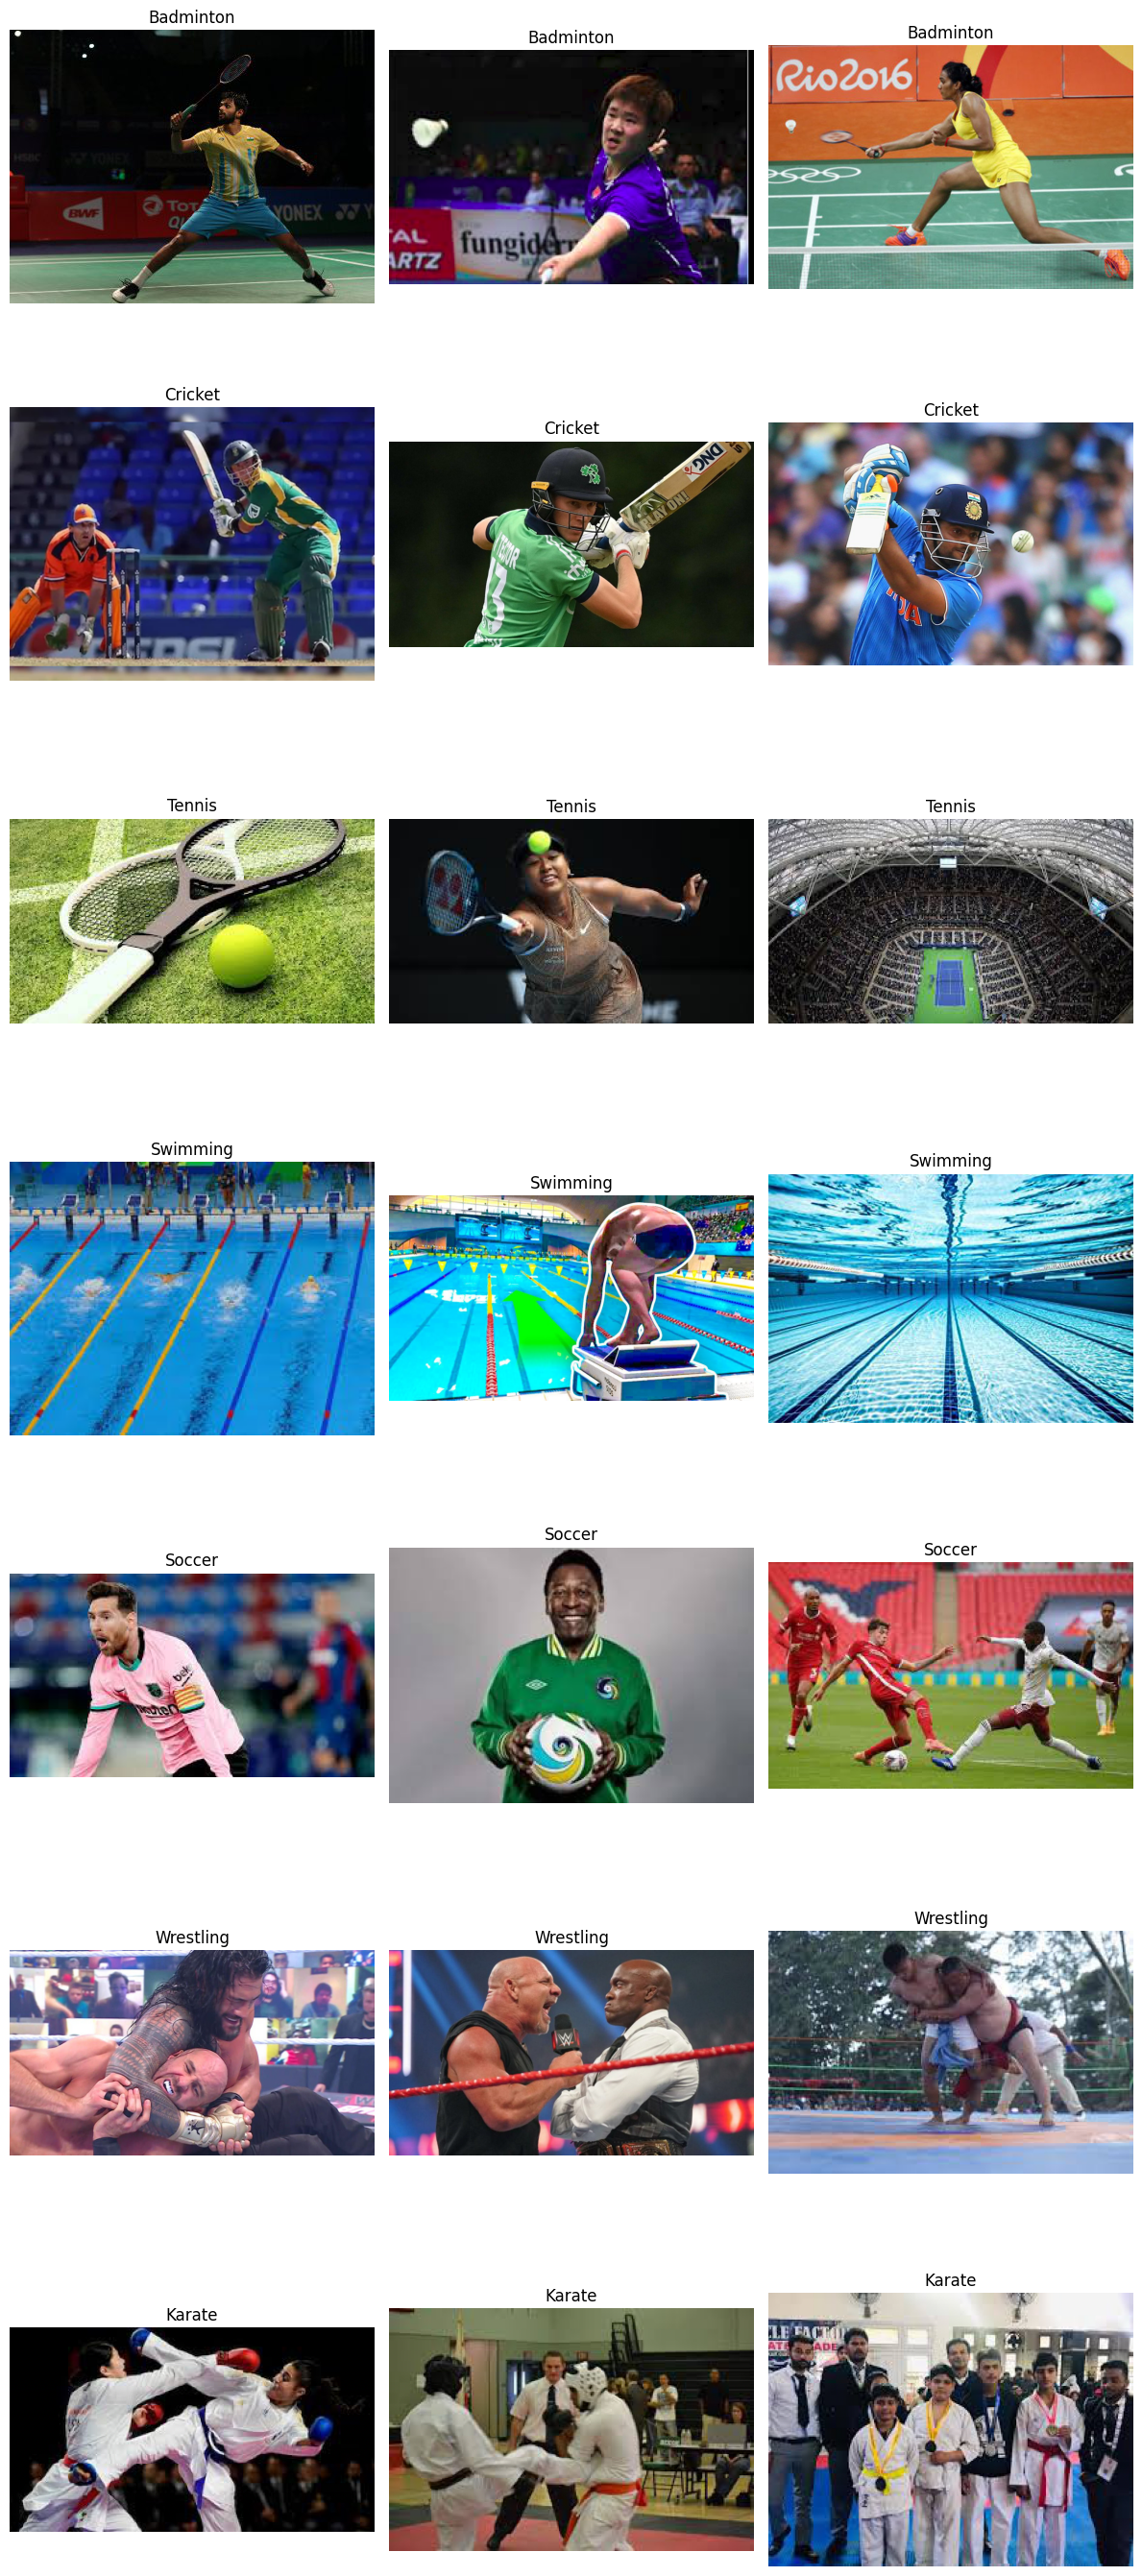

In [ ]:
import pandas as pd
from PIL import Image
import os
import matplotlib.pyplot as plt


df = pd.read_csv(trainCSV_dataset)

num_classes = df['label'].unique()
num_images_per_class = 3

fig, axes = plt.subplots(len(num_classes), num_images_per_class, figsize=(12, len(num_classes) * 4))

for i, label in enumerate(num_classes):

    class_images = df[df['label'] == label].head(num_images_per_class)


    for j, image_id in enumerate(class_images['image_ID']):

        image_path = os.path.join(train_dataset_path, image_id)

        try:
            img = Image.open(image_path)
            axes[i, j].imshow(img)
            axes[i, j].set_title(label)
            axes[i, j].axis('off')
        except Exception as e:
            print(f"Error loading image {image_path}: {e}")

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
# e. Apply data augmentation and other image preprocessing and plot the sample of processed images. ------------------------------------------

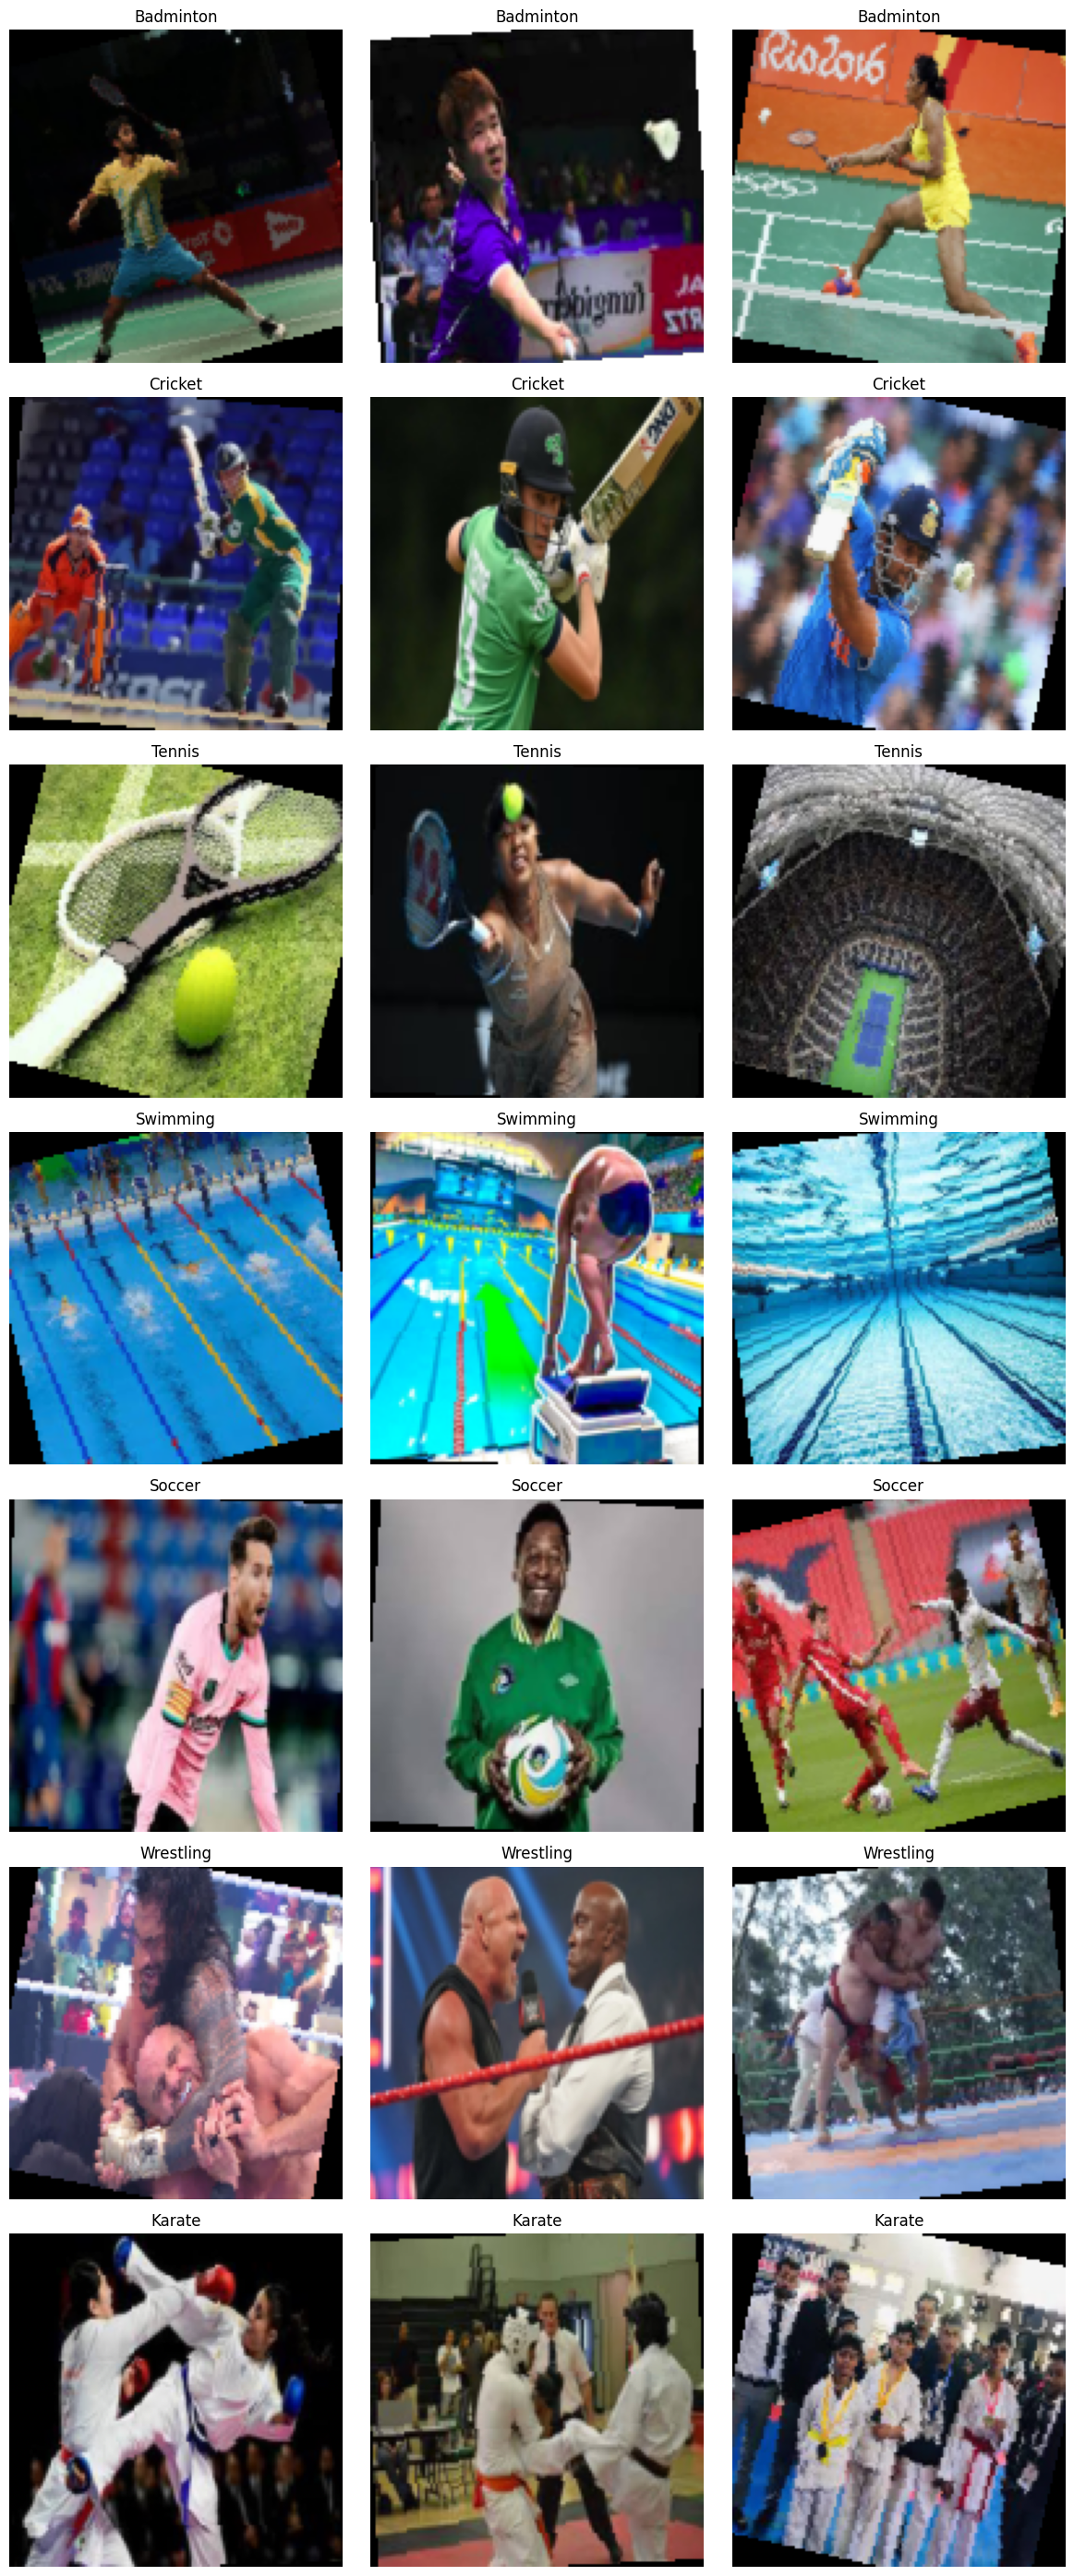

In [ ]:
import pandas as pd
from PIL import Image
import os
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torch


df = pd.read_csv(trainCSV_dataset)

transform = transforms.Compose([
    transforms.Resize((128, 128)),        # Resize to 128x128
    transforms.RandomHorizontalFlip(),      # Randomly flip images horizontally
    transforms.RandomRotation(15),          # Randomly rotate images by up to 15 degrees
    transforms.ToTensor(),                  # Convert the image to a tensor
])

num_classes = df['label'].unique()
num_images_per_class = 3

fig, axes = plt.subplots(len(num_classes), num_images_per_class, figsize=(12, len(num_classes) * 4))

for i, label in enumerate(num_classes):

    class_images = df[df['label'] == label].head(num_images_per_class)


    for j, image_id in enumerate(class_images['image_ID']):

        image_path = os.path.join(train_dataset_path, image_id)


        try:
            img = Image.open(image_path)
            img_tensor = transform(img)


            img_processed = transforms.ToPILImage()(img_tensor)

            axes[i, j].imshow(img_processed)
            axes[i, j].set_title(label)
            axes[i, j].axis('off')
        except Exception as e:
            print(f"Error loading image {image_path}: {e}")

plt.tight_layout()
plt.show()


In [ ]:
# ---------------------------------------- [4] Train a neural network -------------------------------------------------------------

In [ ]:
# Basic model

In [ ]:
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 58.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 43.9 MB/s eta 0:00:0000:0100:01


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import os
import pandas as pd
from PIL import Image
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

# the CNN model
class SportsCNN(nn.Module):
    def __init__(self):
        super(SportsCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 56 * 56, 224)
        self.fc2 = nn.Linear(224, 7)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 56 * 56)  # Flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class CustomDataset(Dataset):
    def __init__(self, csv_file, img_dir, transform=None, class_to_idx=None):
        self.data_frame = pd.read_csv(csv_file)
        self.img_dir = img_dir
        self.transform = transform
        self.class_to_idx = class_to_idx

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
        img_name = os.path.join(self.img_dir, self.data_frame.iloc[idx, 0])
        image = Image.open(img_name).convert('RGB')
        label = self.class_to_idx[self.data_frame.iloc[idx, 1]]

        if self.transform:
            image = self.transform(image)

        return image, label


transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])


data_dir = './dataset/'
train_csv = os.path.join(data_dir, 'train.csv')
train_img_dir = os.path.join(data_dir, 'train')


class_names = pd.read_csv(train_csv)['label'].unique()
class_to_idx = {class_name: idx for idx, class_name in enumerate(class_names)}


train_dataset = CustomDataset(csv_file=train_csv, img_dir=train_img_dir, transform=transform, class_to_idx=class_to_idx)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


model = SportsCNN()

criterion = nn.CrossEntropyLoss()  # For multi-class classification
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

num_epochs = 20
train_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:


        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)

        # Calculating the loss
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()

        # Update weights
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}')


Epoch [1/20], Loss: 1.4073
Epoch [2/20], Loss: 0.6548
Epoch [3/20], Loss: 0.2320
Epoch [4/20], Loss: 0.0805
Epoch [5/20], Loss: 0.0334
Epoch [6/20], Loss: 0.0355
Epoch [7/20], Loss: 0.0493
Epoch [8/20], Loss: 0.0202
Epoch [9/20], Loss: 0.0058
Epoch [10/20], Loss: 0.0011
Epoch [11/20], Loss: 0.0003
Epoch [12/20], Loss: 0.0001
Epoch [13/20], Loss: 0.0001
Epoch [14/20], Loss: 0.0001
Epoch [15/20], Loss: 0.0001
Epoch [16/20], Loss: 0.0001
Epoch [17/20], Loss: 0.0000
Epoch [18/20], Loss: 0.0000
Epoch [19/20], Loss: 0.0000
Epoch [20/20], Loss: 0.0000


In [ ]:
##  vl and train loss

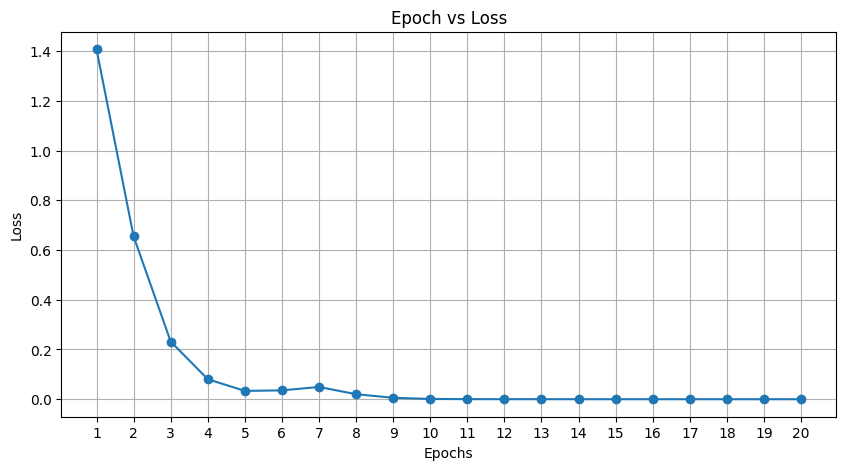

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, marker='o')
plt.title('Epoch vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(range(1, num_epochs + 1))
plt.grid()
plt.show()

In [ ]:
# (a) with h i j Decide the number of layers and neurons in each layer

In [ ]:
#  predicted images from the test dataset
def display_predictions(test_loader):
    model.eval()
    with torch.no_grad():
        images, labels = next(iter(test_loader))
        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        # Plotting
        plt.figure(figsize=(12, 8))
        for i in range(9):
            plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].permute(1, 2, 0).numpy())
            plt.title(f'Pred: {class_names[preds[i]]}, True: {class_names[labels[i]]}')
            plt.axis('off')
        plt.show()

display_predictions(test_loader)

Number of trainable parameters: 44978887
Epoch [1/5], Train Loss: 1.4897, Val Loss: 1.0916, Val F1 Score: 0.6299
Epoch [2/5], Train Loss: 0.7927, Val Loss: 0.8263, Val F1 Score: 0.7223
Epoch [3/5], Train Loss: 0.3927, Val Loss: 0.8102, Val F1 Score: 0.7607
Epoch [4/5], Train Loss: 0.1340, Val Loss: 0.8445, Val F1 Score: 0.7678
Epoch [5/5], Train Loss: 0.0575, Val Loss: 1.0764, Val F1 Score: 0.7730


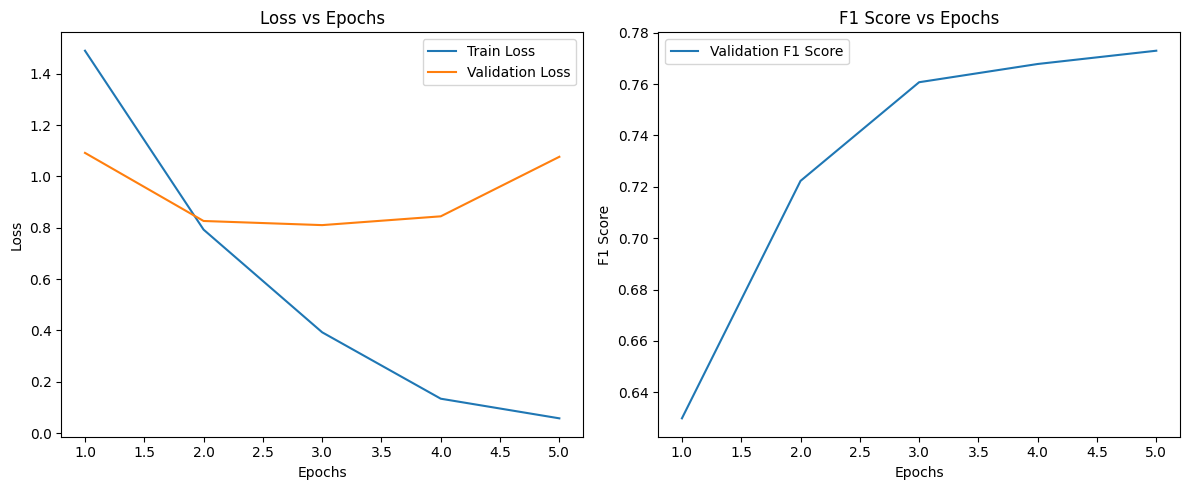

In [ ]:

class SportsCNN(nn.Module):
    def __init__(self):
        super(SportsCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 56 * 56, 224)  # Adjust input size as needed
        self.fc2 = nn.Linear(224, 7)  # Output layer for 7 classes

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 56 * 56)  # Flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


class CustomDataset(Dataset):
    def __init__(self, csv_file, img_dir, transform=None, class_to_idx=None):
        self.data_frame = pd.read_csv(csv_file)
        self.img_dir = img_dir
        self.transform = transform
        self.class_to_idx = class_to_idx

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
        img_name = os.path.join(self.img_dir, self.data_frame.iloc[idx, 0])
        image = Image.open(img_name).convert('RGB')
        label = self.class_to_idx[self.data_frame.iloc[idx, 1]]

        if self.transform:
            image = self.transform(image)

        return image, label

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

data_dir = './dataset/'
train_csv = os.path.join(data_dir, 'train.csv')
train_img_dir = os.path.join(data_dir, 'train')
test_csv = os.path.join(data_dir, 'test.csv')
test_img_dir = os.path.join(data_dir, 'test')


class_names = pd.read_csv(train_csv)['label'].unique()
class_to_idx = {class_name: idx for idx, class_name in enumerate(class_names)}

full_dataset = CustomDataset(csv_file=train_csv, img_dir=train_img_dir, transform=transform, class_to_idx=class_to_idx)

# Split dataset into training and validation sets
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

test_dataset = CustomDataset(csv_file=test_csv, img_dir=test_img_dir, transform=transform, class_to_idx=class_to_idx)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Initialize the model
model = SportsCNN()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()  # For multi-class classification
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

num_epochs = 5  # Set number of epochs
train_losses = []
val_losses = []
train_f1_scores = []
val_f1_scores = []

# Function to calculate F1 score
def calculate_f1(loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in loader:
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.numpy())
            all_labels.extend(labels.numpy())

    return f1_score(all_labels, all_preds, average='weighted')

# Calculate the number of trainable parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'Number of trainable parameters: {count_parameters(model)}')

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    # Training phase
    for images, labels in train_loader:
        optimizer.zero_grad()  # Zero the gradients
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Calculate the loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights
        running_loss += loss.item()  # Accumulate loss

    # Average loss for training
    epoch_train_loss = running_loss / len(train_loader)
    train_losses.append(epoch_train_loss)

    # Validation phase
    model.eval()
    running_val_loss = 0.0
    val_f1 = calculate_f1(val_loader)

    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)  # Calculate validation loss
            running_val_loss += loss.item()  # Accumulate validation loss

    epoch_val_loss = running_val_loss / len(val_loader)
    val_losses.append(epoch_val_loss)
    val_f1_scores.append(val_f1)

    print(f'Epoch [{epoch + 1}/{num_epochs}], '
          f'Train Loss: {epoch_train_loss:.4f}, '
          f'Val Loss: {epoch_val_loss:.4f}, '
          f'Val F1 Score: {val_f1:.4f}')

# Plotting loss vs epochs
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()

# Plotting F1 score vs epochs
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), val_f1_scores, label='Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Epochs')
plt.legend()

plt.tight_layout()
plt.show()



In [ ]:
# b.Try different number of epochs and batch sizes

Number of trainable parameters: 44978887
Epoch [1/20], Train Loss: 1.6345, Val Loss: 1.1455, Val F1 Score: 0.5779
Epoch [2/20], Train Loss: 0.9304, Val Loss: 0.9585, Val F1 Score: 0.6638
Epoch [3/20], Train Loss: 0.4483, Val Loss: 0.9765, Val F1 Score: 0.7050
Epoch [4/20], Train Loss: 0.1653, Val Loss: 0.9727, Val F1 Score: 0.7398
Epoch [5/20], Train Loss: 0.0709, Val Loss: 1.1235, Val F1 Score: 0.7597
Epoch [6/20], Train Loss: 0.0198, Val Loss: 1.4198, Val F1 Score: 0.7672
Epoch [7/20], Train Loss: 0.0175, Val Loss: 1.6652, Val F1 Score: 0.7360
Epoch [8/20], Train Loss: 0.0216, Val Loss: 1.5541, Val F1 Score: 0.7366
Epoch [9/20], Train Loss: 0.0319, Val Loss: 1.7017, Val F1 Score: 0.7525
Epoch [10/20], Train Loss: 0.0326, Val Loss: 1.5534, Val F1 Score: 0.7364
Epoch [11/20], Train Loss: 0.0157, Val Loss: 1.5659, Val F1 Score: 0.7450
Epoch [12/20], Train Loss: 0.0297, Val Loss: 1.6678, Val F1 Score: 0.7450
Epoch [13/20], Train Loss: 0.0326, Val Loss: 1.7394, Val F1 Score: 0.7548
Epoch 

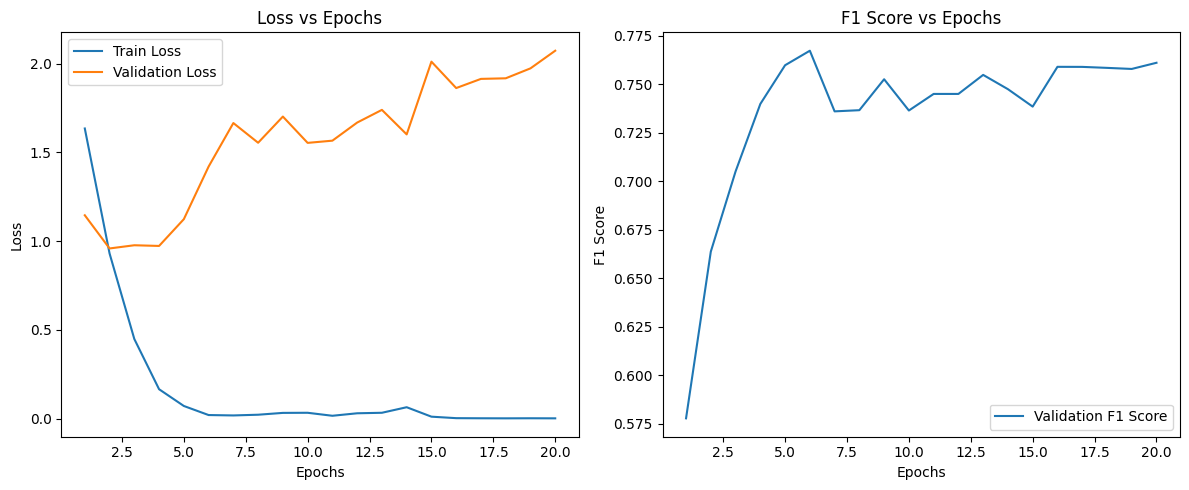

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics import f1_score
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader, random_split

# Define the CNN model
class SportsCNN(nn.Module):
    def __init__(self):
        super(SportsCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 56 * 56, 224)  # Adjust input size as needed
        self.fc2 = nn.Linear(224, 7)  # Output layer for 7 classes

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 56 * 56)  # Flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Custom dataset class
class CustomDataset(Dataset):
    def __init__(self, csv_file, img_dir, transform=None, class_to_idx=None):
        self.data_frame = pd.read_csv(csv_file)
        self.img_dir = img_dir
        self.transform = transform
        self.class_to_idx = class_to_idx

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
        img_name = os.path.join(self.img_dir, self.data_frame.iloc[idx, 0])
        image = Image.open(img_name).convert('RGB')  # Ensure image is RGB
        label = self.class_to_idx[self.data_frame.iloc[idx, 1]]  # Convert class name to index

        if self.transform:
            image = self.transform(image)

        return image, label

# Define transformations
#  transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

#  paths
data_dir = './dataset/'
train_csv = os.path.join(data_dir, 'train.csv')
train_img_dir = os.path.join(data_dir, 'train')
test_csv = os.path.join(data_dir, 'test.csv')
test_img_dir = os.path.join(data_dir, 'test')


#  a mapping from class names to indices
class_names = pd.read_csv(train_csv)['label'].unique()  # Assuming 'label' is the column with class names
class_to_idx = {class_name: idx for idx, class_name in enumerate(class_names)}

#  dataset and dataloader
full_dataset = CustomDataset(csv_file=train_csv, img_dir=train_img_dir, transform=transform, class_to_idx=class_to_idx)

#  dataset into training and validation sets
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

batch_size = 32
num_epochs = 20

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


test_dataset = CustomDataset(csv_file=test_csv, img_dir=test_img_dir, transform=transform, class_to_idx=class_to_idx)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialize the model
model = SportsCNN()


criterion = nn.CrossEntropyLoss()  # For multi-class classification
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

train_losses = []
val_losses = []
train_f1_scores = []
val_f1_scores = []

# Function to calculate F1 score
def calculate_f1(loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in loader:
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.numpy())
            all_labels.extend(labels.numpy())

    return f1_score(all_labels, all_preds, average='weighted')

# Calculate the number of trainable parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'Number of trainable parameters: {count_parameters(model)}')

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    # Training phase
    for images, labels in train_loader:
        optimizer.zero_grad()  # Zero the gradients
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Calculate the loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights
        running_loss += loss.item()  # Accumulate loss

    # Average loss for training
    epoch_train_loss = running_loss / len(train_loader)
    train_losses.append(epoch_train_loss)

    # Validation phase
    model.eval()  # Set the model to evaluation mode
    running_val_loss = 0.0
    val_f1 = calculate_f1(val_loader)

    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)  # Calculate validation loss
            running_val_loss += loss.item()  # Accumulate validation loss

    epoch_val_loss = running_val_loss / len(val_loader)
    val_losses.append(epoch_val_loss)
    val_f1_scores.append(val_f1)

    print(f'Epoch [{epoch + 1}/{num_epochs}], '
          f'Train Loss: {epoch_train_loss:.4f}, '
          f'Val Loss: {epoch_val_loss:.4f}, '
          f'Val F1 Score: {val_f1:.4f}')

# Plotting loss vs epochs
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()

# Plotting F1 score vs epochs
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), val_f1_scores, label='Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Epochs')
plt.legend()

plt.tight_layout()
plt.show()



In [ ]:
# c. Try out different activation functions

In [ ]:
# 1. Model Using Leaky ReLU

Number of trainable parameters: 44978887
Epoch [1/20], Train Loss: 2.1211, Val Loss: 1.3589, Val F1 Score: 0.5151
Epoch [2/20], Train Loss: 0.9431, Val Loss: 1.0830, Val F1 Score: 0.6632
Epoch [3/20], Train Loss: 0.5423, Val Loss: 0.8240, Val F1 Score: 0.7503
Epoch [4/20], Train Loss: 0.2163, Val Loss: 0.8309, Val F1 Score: 0.7721
Epoch [5/20], Train Loss: 0.0805, Val Loss: 0.9878, Val F1 Score: 0.7916
Epoch [6/20], Train Loss: 0.0617, Val Loss: 1.4092, Val F1 Score: 0.7602
Epoch [7/20], Train Loss: 0.0699, Val Loss: 1.0893, Val F1 Score: 0.7862
Epoch [8/20], Train Loss: 0.0323, Val Loss: 1.3389, Val F1 Score: 0.7815
Epoch [9/20], Train Loss: 0.0505, Val Loss: 1.4803, Val F1 Score: 0.7651
Epoch [10/20], Train Loss: 0.0329, Val Loss: 1.6515, Val F1 Score: 0.7633
Epoch [11/20], Train Loss: 0.0264, Val Loss: 1.6398, Val F1 Score: 0.7701
Epoch [12/20], Train Loss: 0.0748, Val Loss: 1.7425, Val F1 Score: 0.7630
Epoch [13/20], Train Loss: 0.0851, Val Loss: 1.7555, Val F1 Score: 0.7551
Epoch 

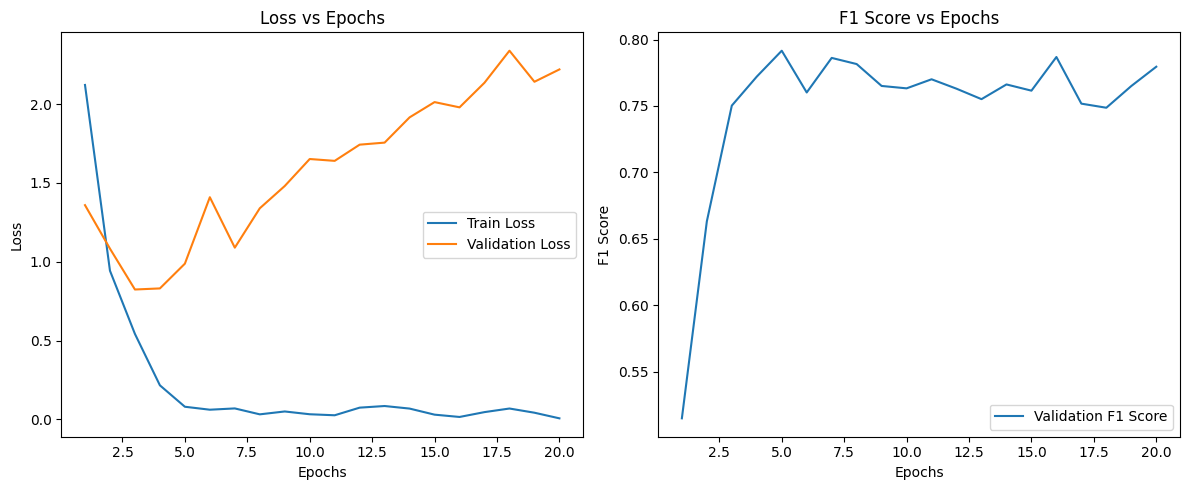

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics import f1_score
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader, random_split

# Define the CNN model
class SportsCNN(nn.Module):
    def __init__(self):
        super(SportsCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 56 * 56, 224)  # Adjust input size as needed
        self.fc2 = nn.Linear(224, 7)  # Output layer for 7 classes

        # Define Leaky ReLU
        self.leaky_relu = nn.LeakyReLU(negative_slope=0.2)

    def forward(self, x):
        x = self.pool(self.leaky_relu(self.conv1(x)))  # Leaky ReLU after first convolution
        x = self.pool(self.leaky_relu(self.conv2(x)))  # Leaky ReLU after second convolution
        x = x.view(-1, 64 * 56 * 56)  # Flatten
        x = self.leaky_relu(self.fc1(x))  # Leaky ReLU after first fully connected layer
        x = self.fc2(x)  # Output layer (no activation needed for logits)
        return x

# Custom dataset class
class CustomDataset(Dataset):
    def __init__(self, csv_file, img_dir, transform=None, class_to_idx=None):
        self.data_frame = pd.read_csv(csv_file)
        self.img_dir = img_dir
        self.transform = transform
        self.class_to_idx = class_to_idx

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
        img_name = os.path.join(self.img_dir, self.data_frame.iloc[idx, 0])
        image = Image.open(img_name).convert('RGB')  # Ensure image is RGB
        label = self.class_to_idx[self.data_frame.iloc[idx, 1]]  # Convert class name to index

        if self.transform:
            image = self.transform(image)

        return image, label

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224
    transforms.ToTensor(),           # Convert to tensor
])

# Specify paths
data_dir = './dataset/'  # Base directory for your dataset
train_csv = os.path.join(data_dir, 'train.csv')  # Path to the training CSV file
train_img_dir = os.path.join(data_dir, 'train')   # Path to the training images
test_csv = os.path.join(data_dir, 'test.csv')      # Path to the test CSV file
test_img_dir = os.path.join(data_dir, 'test')       # Path to the test images

# Create a mapping from class names to indices
class_names = pd.read_csv(train_csv)['label'].unique()  # Assuming 'label' is the column with class names
class_to_idx = {class_name: idx for idx, class_name in enumerate(class_names)}

# Create dataset and dataloader
full_dataset = CustomDataset(csv_file=train_csv, img_dir=train_img_dir, transform=transform, class_to_idx=class_to_idx)

# Split dataset into training and validation sets
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# Define batch size and number of epochs
batch_size = 32  # Change this value as needed
num_epochs = 20  # Change this value as needed

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Create test dataset and dataloader
test_dataset = CustomDataset(csv_file=test_csv, img_dir=test_img_dir, transform=transform, class_to_idx=class_to_idx)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialize the model
model = SportsCNN()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()  # For multi-class classification
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

train_losses = []
val_losses = []
train_f1_scores = []
val_f1_scores = []

# Function to calculate F1 score
def calculate_f1(loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in loader:
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.numpy())
            all_labels.extend(labels.numpy())

    return f1_score(all_labels, all_preds, average='weighted')

# Calculate the number of trainable parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'Number of trainable parameters: {count_parameters(model)}')

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    # Training phase
    for images, labels in train_loader:
        optimizer.zero_grad()  # Zero the gradients
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Calculate the loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights
        running_loss += loss.item()  # Accumulate loss

    # Average loss for training
    epoch_train_loss = running_loss / len(train_loader)
    train_losses.append(epoch_train_loss)

    # Validation phase
    model.eval()
    running_val_loss = 0.0
    val_f1 = calculate_f1(val_loader)

    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()

    epoch_val_loss = running_val_loss / len(val_loader)
    val_losses.append(epoch_val_loss)
    val_f1_scores.append(val_f1)

    print(f'Epoch [{epoch + 1}/{num_epochs}], '
          f'Train Loss: {epoch_train_loss:.4f}, '
          f'Val Loss: {epoch_val_loss:.4f}, '
          f'Val F1 Score: {val_f1:.4f}')

# Plotting loss vs epochs
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()

# Plotting F1 score vs epochs
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), val_f1_scores, label='Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Epochs')
plt.legend()

plt.tight_layout()
plt.show()



In [ ]:
# 2. Model Using ELU

Number of trainable parameters: 44978887
Epoch [1/12], Train Loss: 2.0082, Val Loss: 1.3101, Val F1 Score: 0.5090
Epoch [2/12], Train Loss: 1.0860, Val Loss: 1.1488, Val F1 Score: 0.5965
Epoch [3/12], Train Loss: 0.8065, Val Loss: 0.9450, Val F1 Score: 0.6921
Epoch [4/12], Train Loss: 0.5565, Val Loss: 0.9649, Val F1 Score: 0.7125
Epoch [5/12], Train Loss: 0.3163, Val Loss: 0.9591, Val F1 Score: 0.7338
Epoch [6/12], Train Loss: 0.1831, Val Loss: 1.2244, Val F1 Score: 0.7176
Epoch [7/12], Train Loss: 0.1102, Val Loss: 1.3475, Val F1 Score: 0.7313
Epoch [8/12], Train Loss: 0.0903, Val Loss: 1.6046, Val F1 Score: 0.7302
Epoch [9/12], Train Loss: 0.0584, Val Loss: 1.4135, Val F1 Score: 0.7459
Epoch [10/12], Train Loss: 0.0423, Val Loss: 1.6773, Val F1 Score: 0.7613
Epoch [11/12], Train Loss: 0.0334, Val Loss: 1.6760, Val F1 Score: 0.7544
Epoch [12/12], Train Loss: 0.0478, Val Loss: 1.9431, Val F1 Score: 0.7447


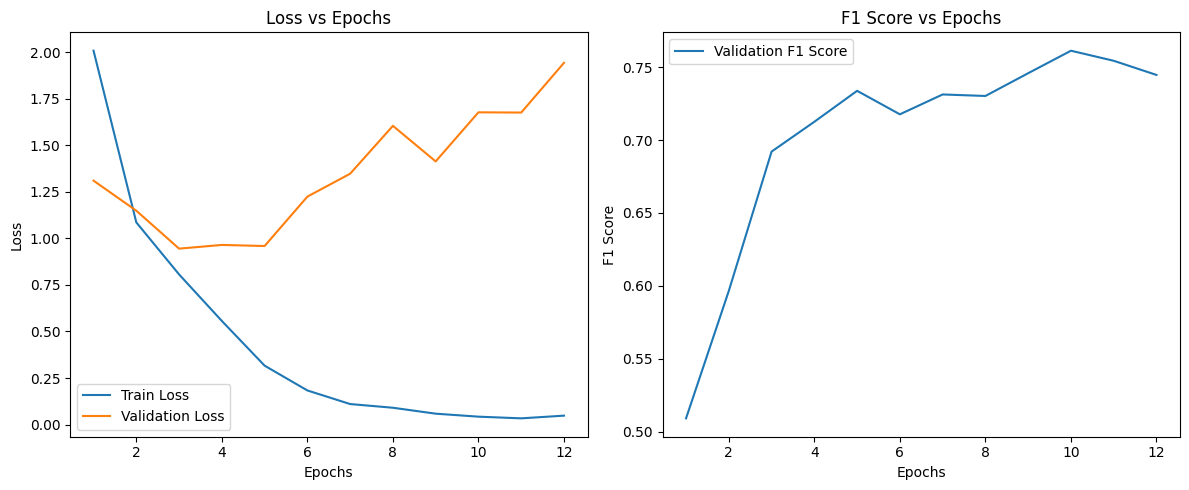

In [ ]:

# Define the CNN model
class SportsCNN(nn.Module):
    def __init__(self):
        super(SportsCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 56 * 56, 224)  # Adjust input size as needed
        self.fc2 = nn.Linear(224, 7)  # Output layer for 7 classes
        self.elu = nn.ELU(alpha=1.0)

    def forward(self, x):
        x = self.pool(F.elu(self.conv1(x)))
        x = self.pool(F.elu(self.conv2(x)))
        x = x.view(-1, 64 * 56 * 56)  # Flatten
        x = F.elu(self.fc1(x))
        x = self.fc2(x)
        return x


class CustomDataset(Dataset):
    def __init__(self, csv_file, img_dir, transform=None, class_to_idx=None):
        self.data_frame = pd.read_csv(csv_file)
        self.img_dir = img_dir
        self.transform = transform
        self.class_to_idx = class_to_idx

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
        img_name = os.path.join(self.img_dir, self.data_frame.iloc[idx, 0])
        image = Image.open(img_name).convert('RGB')
        label = self.class_to_idx[self.data_frame.iloc[idx, 1]]

        if self.transform:
            image = self.transform(image)

        return image, label

#  transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

#  paths
data_dir = './dataset/'
train_csv = os.path.join(data_dir, 'train.csv')
train_img_dir = os.path.join(data_dir, 'train')
test_csv = os.path.join(data_dir, 'test.csv')
test_img_dir = os.path.join(data_dir, 'test')


class_names = pd.read_csv(train_csv)['label'].unique()
class_to_idx = {class_name: idx for idx, class_name in enumerate(class_names)}


full_dataset = CustomDataset(csv_file=train_csv, img_dir=train_img_dir, transform=transform, class_to_idx=class_to_idx)

#  dataset into training and validation sets
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])


batch_size = 32
num_epochs = 12

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

#  test dataset and dataloader
test_dataset = CustomDataset(csv_file=test_csv, img_dir=test_img_dir, transform=transform, class_to_idx=class_to_idx)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


model = SportsCNN()


criterion = nn.CrossEntropyLoss()  #  multi-class classification
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

train_losses = []
val_losses = []
train_f1_scores = []
val_f1_scores = []


def calculate_f1(loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in loader:
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.numpy())
            all_labels.extend(labels.numpy())

    return f1_score(all_labels, all_preds, average='weighted')

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'Number of trainable parameters: {count_parameters(model)}')

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    # Training phase
    for images, labels in train_loader:
        optimizer.zero_grad()  # Zero the gradients
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Calculate the loss
        loss.backward()  # Backward pass
        optimizer.step()
        running_loss += loss.item()


    epoch_train_loss = running_loss / len(train_loader)
    train_losses.append(epoch_train_loss)


    model.eval()
    running_val_loss = 0.0
    val_f1 = calculate_f1(val_loader)

    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()

    epoch_val_loss = running_val_loss / len(val_loader)
    val_losses.append(epoch_val_loss)
    val_f1_scores.append(val_f1)

    print(f'Epoch [{epoch + 1}/{num_epochs}], '
          f'Train Loss: {epoch_train_loss:.4f}, '
          f'Val Loss: {epoch_val_loss:.4f}, '
          f'Val F1 Score: {val_f1:.4f}')

# Plotting loss vs epochs
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()

# Plotting F1 score vs epochs
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), val_f1_scores, label='Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Epochs')
plt.legend()

plt.tight_layout()
plt.show()



In [ ]:
# 3. Tanh

Number of trainable parameters: 44978887
Epoch [1/12], Train Loss: 1.9210, Val Loss: 1.8129, Val F1 Score: 0.1462
Epoch [2/12], Train Loss: 1.8037, Val Loss: 1.8595, Val F1 Score: 0.0758
Epoch [3/12], Train Loss: 1.7786, Val Loss: 1.7614, Val F1 Score: 0.2249
Epoch [4/12], Train Loss: 1.7640, Val Loss: 1.7859, Val F1 Score: 0.1847
Epoch [5/12], Train Loss: 1.7589, Val Loss: 1.7746, Val F1 Score: 0.2649
Epoch [6/12], Train Loss: 1.7554, Val Loss: 1.7588, Val F1 Score: 0.2438
Epoch [7/12], Train Loss: 1.7135, Val Loss: 1.7605, Val F1 Score: 0.1988
Epoch [8/12], Train Loss: 1.7931, Val Loss: 1.7846, Val F1 Score: 0.2156
Epoch [9/12], Train Loss: 1.8007, Val Loss: 1.7835, Val F1 Score: 0.2187
Epoch [10/12], Train Loss: 1.8070, Val Loss: 1.9006, Val F1 Score: 0.0565
Epoch [11/12], Train Loss: 1.8969, Val Loss: 1.9023, Val F1 Score: 0.0569
Epoch [12/12], Train Loss: 1.8402, Val Loss: 1.7944, Val F1 Score: 0.2264


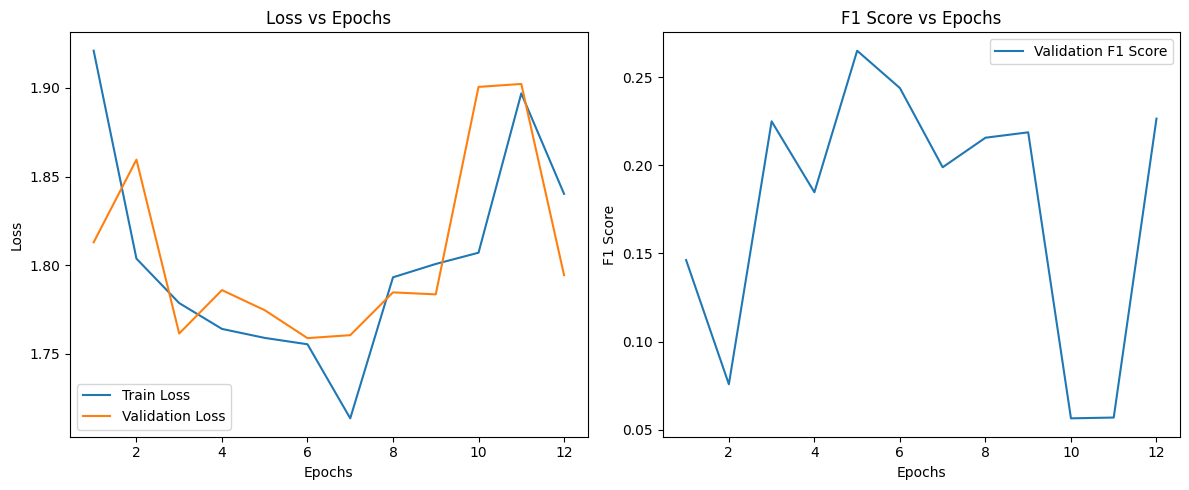

In [ ]:

class SportsCNN(nn.Module):
    def __init__(self):
        super(SportsCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 56 * 56, 224)
        self.fc2 = nn.Linear(224, 7)

    def forward(self, x):
        x = self.pool(torch.tanh(self.conv1(x)))  #  tanh after first convolution
        x = self.pool(torch.tanh(self.conv2(x)))  #  tanh after second convolution
        x = x.view(-1, 64 * 56 * 56)  # Flatten
        x = torch.tanh(self.fc1(x))  #  tanh after first fully connected layer
        x = self.fc2(x)


class CustomDataset(Dataset):
    def __init__(self, csv_file, img_dir, transform=None, class_to_idx=None):
        self.data_frame = pd.read_csv(csv_file)
        self.img_dir = img_dir
        self.transform = transform
        self.class_to_idx = class_to_idx

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
        img_name = os.path.join(self.img_dir, self.data_frame.iloc[idx, 0])
        image = Image.open(img_name).convert('RGB')  # Ensure image is RGB
        label = self.class_to_idx[self.data_frame.iloc[idx, 1]]  # Convert class name to index

        if self.transform:
            image = self.transform(image)

        return image, label


transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

#  paths
data_dir = './dataset/'
train_csv = os.path.join(data_dir, 'train.csv')
train_img_dir = os.path.join(data_dir, 'train')
test_csv = os.path.join(data_dir, 'test.csv')
test_img_dir = os.path.join(data_dir, 'test')

#  a mapping from class names to indices
class_names = pd.read_csv(train_csv)['label'].unique()
class_to_idx = {class_name: idx for idx, class_name in enumerate(class_names)}

#  dataset and dataloader
full_dataset = CustomDataset(csv_file=train_csv, img_dir=train_img_dir, transform=transform, class_to_idx=class_to_idx)

train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

batch_size = 32
num_epochs = 12

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


test_dataset = CustomDataset(csv_file=test_csv, img_dir=test_img_dir, transform=transform, class_to_idx=class_to_idx)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


model = SportsCNN()


criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

train_losses = []
val_losses = []
train_f1_scores = []
val_f1_scores = []

def calculate_f1(loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in loader:
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.numpy())
            all_labels.extend(labels.numpy())

    return f1_score(all_labels, all_preds, average='weighted')

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'Number of trainable parameters: {count_parameters(model)}')

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0


    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()


    epoch_train_loss = running_loss / len(train_loader)
    train_losses.append(epoch_train_loss)


    model.eval()
    running_val_loss = 0.0
    val_f1 = calculate_f1(val_loader)

    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()

    epoch_val_loss = running_val_loss / len(val_loader)
    val_losses.append(epoch_val_loss)
    val_f1_scores.append(val_f1)

    print(f'Epoch [{epoch + 1}/{num_epochs}], '
          f'Train Loss: {epoch_train_loss:.4f}, '
          f'Val Loss: {epoch_val_loss:.4f}, '
          f'Val F1 Score: {val_f1:.4f}')

# Plotting loss vs epochs
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()

# Plotting F1 score vs epochs
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), val_f1_scores, label='Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Epochs')
plt.legend()

plt.tight_layout()
plt.show()



In [ ]:
# d.Try at least three different regularizations

In [ ]:
# 1. L1

Number of trainable parameters: 44978887
Epoch [1/12], Train Loss: 9.8293, Val Loss: 7.6537, Val F1 Score: 0.1068
Epoch [2/12], Train Loss: 7.6321, Val Loss: 7.6360, Val F1 Score: 0.2373
Epoch [3/12], Train Loss: 7.4463, Val Loss: 7.4505, Val F1 Score: 0.2712
Epoch [4/12], Train Loss: 7.3705, Val Loss: 7.3374, Val F1 Score: 0.3160
Epoch [5/12], Train Loss: 7.2719, Val Loss: 7.2575, Val F1 Score: 0.3620
Epoch [6/12], Train Loss: 7.2103, Val Loss: 7.1658, Val F1 Score: 0.3777
Epoch [7/12], Train Loss: 7.1522, Val Loss: 7.1487, Val F1 Score: 0.3043
Epoch [8/12], Train Loss: 7.1152, Val Loss: 7.2498, Val F1 Score: 0.3883
Epoch [9/12], Train Loss: 7.0652, Val Loss: 6.9839, Val F1 Score: 0.3734
Epoch [10/12], Train Loss: 7.0208, Val Loss: 7.0628, Val F1 Score: 0.3770
Epoch [11/12], Train Loss: 6.9910, Val Loss: 7.0793, Val F1 Score: 0.3944
Epoch [12/12], Train Loss: 6.9767, Val Loss: 6.9257, Val F1 Score: 0.3856


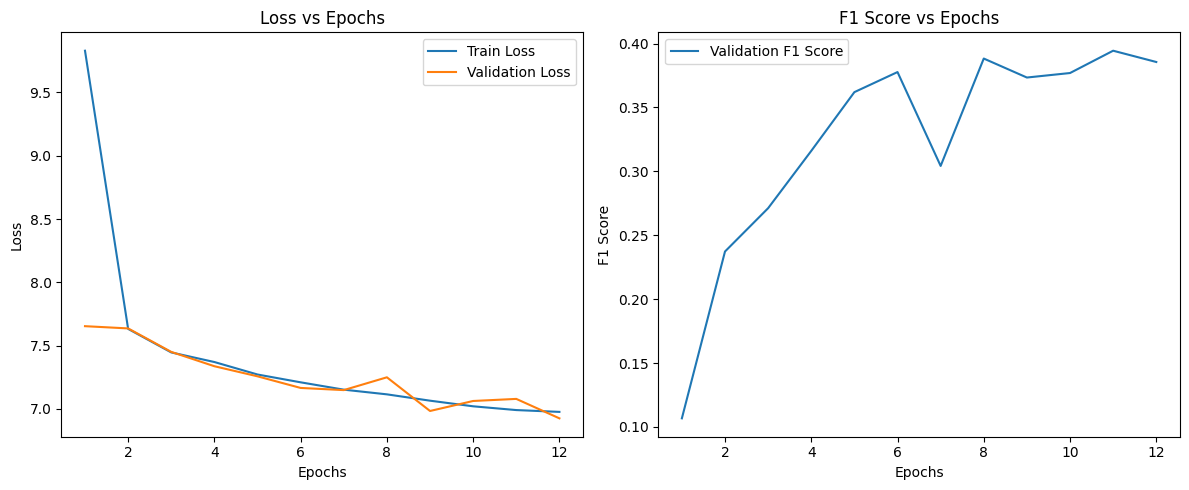

In [ ]:

class SportsCNN(nn.Module):
    def __init__(self):
        super(SportsCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 56 * 56, 224)
        self.fc2 = nn.Linear(224, 7)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  #  ReLU after first convolution
        x = self.pool(F.relu(self.conv2(x)))  #  ReLU after second convolution
        x = x.view(-1, 64 * 56 * 56)  #
        x = F.relu(self.fc1(x))  #  ReLU after first fully connected layer
        x = self.fc2(x)
        return x


class CustomDataset(Dataset):
    def __init__(self, csv_file, img_dir, transform=None, class_to_idx=None):
        self.data_frame = pd.read_csv(csv_file)
        self.img_dir = img_dir
        self.transform = transform
        self.class_to_idx = class_to_idx

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
        img_name = os.path.join(self.img_dir, self.data_frame.iloc[idx, 0])
        image = Image.open(img_name).convert('RGB')  # Ensure image is RGB
        label = self.class_to_idx[self.data_frame.iloc[idx, 1]]  # Convert class name to index

        if self.transform:
            image = self.transform(image)

        return image, label


transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])


data_dir = './dataset/'
train_csv = os.path.join(data_dir, 'train.csv')
train_img_dir = os.path.join(data_dir, 'train')
test_csv = os.path.join(data_dir, 'test.csv')
test_img_dir = os.path.join(data_dir, 'test')


class_names = pd.read_csv(train_csv)['label'].unique()
class_to_idx = {class_name: idx for idx, class_name in enumerate(class_names)}


full_dataset = CustomDataset(csv_file=train_csv, img_dir=train_img_dir, transform=transform, class_to_idx=class_to_idx)

train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

batch_size = 32
num_epochs = 12

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


test_dataset = CustomDataset(csv_file=test_csv, img_dir=test_img_dir, transform=transform, class_to_idx=class_to_idx)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


model = SportsCNN()

criterion = nn.CrossEntropyLoss()  #  multi-class classification
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

#  L1 regularization strength
l1_lambda = 0.001

train_losses = []
val_losses = []
train_f1_scores = []
val_f1_scores = []


def calculate_f1(loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in loader:
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.numpy())
            all_labels.extend(labels.numpy())

    return f1_score(all_labels, all_preds, average='weighted')


def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'Number of trainable parameters: {count_parameters(model)}')

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0


    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)

        #  L1 regularization
        l1_norm = sum(p.abs().sum() for p in model.parameters())
        loss += l1_lambda * l1_norm  #  L1 loss to the main loss

        loss.backward()
        optimizer.step()
        running_loss += loss.item()


    epoch_train_loss = running_loss / len(train_loader)
    train_losses.append(epoch_train_loss)


    model.eval()
    running_val_loss = 0.0
    val_f1 = calculate_f1(val_loader)

    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)

            l1_norm = sum(p.abs().sum() for p in model.parameters())
            loss += l1_lambda * l1_norm

            running_val_loss += loss.item()
    epoch_val_loss = running_val_loss / len(val_loader)
    val_losses.append(epoch_val_loss)
    val_f1_scores.append(val_f1)

    print(f'Epoch [{epoch + 1}/{num_epochs}], '
          f'Train Loss: {epoch_train_loss:.4f}, '
          f'Val Loss: {epoch_val_loss:.4f}, '
          f'Val F1 Score: {val_f1:.4f}')

# Plotting loss vs epochs
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()

# Plotting F1 score vs epochs
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), val_f1_scores, label='Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Epochs')
plt.legend()

plt.tight_layout()
plt.show()



In [ ]:
# 2. L2

Number of trainable parameters: 44978887
Epoch [1/12], Train Loss: 2.1560, Val Loss: 1.6849, Val F1 Score: 0.4089
Epoch [2/12], Train Loss: 1.4653, Val Loss: 1.5210, Val F1 Score: 0.4913
Epoch [3/12], Train Loss: 1.2276, Val Loss: 1.3178, Val F1 Score: 0.6063
Epoch [4/12], Train Loss: 1.0485, Val Loss: 1.2362, Val F1 Score: 0.6313
Epoch [5/12], Train Loss: 0.9005, Val Loss: 1.1658, Val F1 Score: 0.7043
Epoch [6/12], Train Loss: 0.7518, Val Loss: 1.3095, Val F1 Score: 0.6937
Epoch [7/12], Train Loss: 0.6821, Val Loss: 1.3788, Val F1 Score: 0.6924
Epoch [8/12], Train Loss: 0.6405, Val Loss: 1.2874, Val F1 Score: 0.7377
Epoch [9/12], Train Loss: 0.4984, Val Loss: 1.3206, Val F1 Score: 0.7319
Epoch [10/12], Train Loss: 0.5010, Val Loss: 1.3934, Val F1 Score: 0.7149
Epoch [11/12], Train Loss: 0.5206, Val Loss: 1.4437, Val F1 Score: 0.7351
Epoch [12/12], Train Loss: 0.4975, Val Loss: 1.5984, Val F1 Score: 0.7073


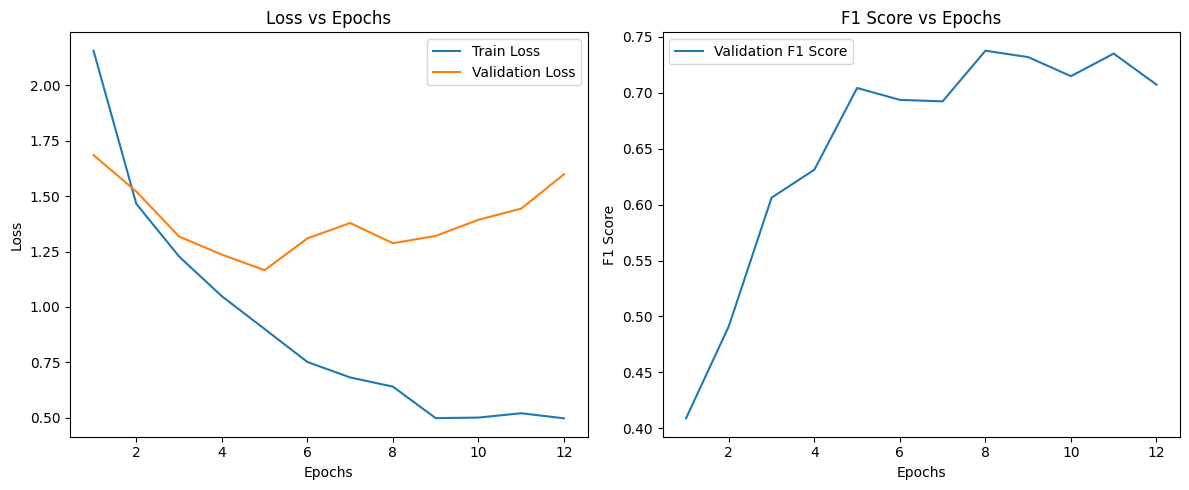

In [ ]:

class SportsCNN(nn.Module):
    def __init__(self):
        super(SportsCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 56 * 56, 224)
        self.fc2 = nn.Linear(224, 7)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  #  ReLU after first convolution
        x = self.pool(F.relu(self.conv2(x)))  #  ReLU after second convolution
        x = x.view(-1, 64 * 56 * 56)  # Flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


class CustomDataset(Dataset):
    def __init__(self, csv_file, img_dir, transform=None, class_to_idx=None):
        self.data_frame = pd.read_csv(csv_file)
        self.img_dir = img_dir
        self.transform = transform
        self.class_to_idx = class_to_idx

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
        img_name = os.path.join(self.img_dir, self.data_frame.iloc[idx, 0])
        image = Image.open(img_name).convert('RGB')
        label = self.class_to_idx[self.data_frame.iloc[idx, 1]]

        if self.transform:
            image = self.transform(image)

        return image, label


transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])


data_dir = './dataset/'
train_csv = os.path.join(data_dir, 'train.csv')
train_img_dir = os.path.join(data_dir, 'train')
test_csv = os.path.join(data_dir, 'test.csv')
test_img_dir = os.path.join(data_dir, 'test')


class_names = pd.read_csv(train_csv)['label'].unique()
class_to_idx = {class_name: idx for idx, class_name in enumerate(class_names)}


full_dataset = CustomDataset(csv_file=train_csv, img_dir=train_img_dir, transform=transform, class_to_idx=class_to_idx)


train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])


batch_size = 32
num_epochs = 12

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


test_dataset = CustomDataset(csv_file=test_csv, img_dir=test_img_dir, transform=transform, class_to_idx=class_to_idx)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

model = SportsCNN()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

#  L2 regularization
l2_lambda = 0.001

train_losses = []
val_losses = []
train_f1_scores = []
val_f1_scores = []

def calculate_f1(loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in loader:
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.numpy())
            all_labels.extend(labels.numpy())

    return f1_score(all_labels, all_preds, average='weighted')

#  the number of trainable parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'Number of trainable parameters: {count_parameters(model)}')

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    # Training phase
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)

        #  L2 regularization
        l2_norm = sum(p.pow(2).sum() for p in model.parameters())

        #  L2 loss to the main loss
        loss += l2_lambda * l2_norm

        loss.backward()
        optimizer.step()
        running_loss += loss.item()


    epoch_train_loss = running_loss / len(train_loader)
    train_losses.append(epoch_train_loss)

    # Validation phase
    model.eval()
    running_val_loss = 0.0
    val_f1 = calculate_f1(val_loader)

    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)


            l2_norm = sum(p.pow(2).sum() for p in model.parameters())


            loss += l2_lambda * l2_norm

            running_val_loss += loss.item()

    epoch_val_loss = running_val_loss / len(val_loader)
    val_losses.append(epoch_val_loss)
    val_f1_scores.append(val_f1)

    print(f'Epoch [{epoch + 1}/{num_epochs}], '
          f'Train Loss: {epoch_train_loss:.4f}, '
          f'Val Loss: {epoch_val_loss:.4f}, '
          f'Val F1 Score: {val_f1:.4f}')

# Plotting loss vs epochs
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()

# Plotting F1 score vs epochs
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), val_f1_scores, label='Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Epochs')
plt.legend()

plt.tight_layout()
plt.show()



In [ ]:
# 3. Dropout

Number of trainable parameters: 44978887
Epoch [1/12], Train Loss: 1.7041, Val Loss: 1.2380, Val F1 Score: 0.5205
Epoch [2/12], Train Loss: 1.1762, Val Loss: 1.0502, Val F1 Score: 0.6206
Epoch [3/12], Train Loss: 0.9497, Val Loss: 0.8556, Val F1 Score: 0.6985
Epoch [4/12], Train Loss: 0.6915, Val Loss: 0.7361, Val F1 Score: 0.7635
Epoch [5/12], Train Loss: 0.4712, Val Loss: 0.6829, Val F1 Score: 0.7907
Epoch [6/12], Train Loss: 0.3234, Val Loss: 0.7706, Val F1 Score: 0.7990
Epoch [7/12], Train Loss: 0.2204, Val Loss: 0.7199, Val F1 Score: 0.8125
Epoch [8/12], Train Loss: 0.1609, Val Loss: 0.7443, Val F1 Score: 0.8247
Epoch [9/12], Train Loss: 0.1295, Val Loss: 0.8379, Val F1 Score: 0.8234
Epoch [10/12], Train Loss: 0.1087, Val Loss: 0.8384, Val F1 Score: 0.8223
Epoch [11/12], Train Loss: 0.1095, Val Loss: 1.0834, Val F1 Score: 0.8000
Epoch [12/12], Train Loss: 0.1018, Val Loss: 1.0626, Val F1 Score: 0.8159


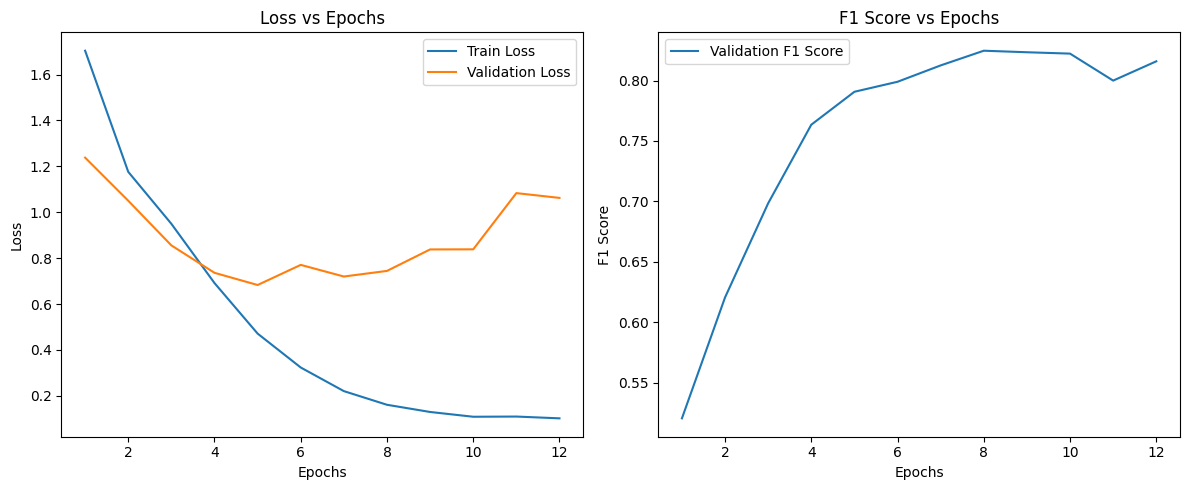

In [ ]:


class SportsCNN(nn.Module):
    def __init__(self, dropout_rate=0.5):
        super(SportsCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 56 * 56, 224)
        self.fc2 = nn.Linear(224, 7)
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  #  ReLU after first convolution
        x = self.pool(F.relu(self.conv2(x)))  #  ReLU after second convolution
        x = x.view(-1, 64 * 56 * 56)  # Flatten
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.fc2(x)
        return x


class CustomDataset(Dataset):
    def __init__(self, csv_file, img_dir, transform=None, class_to_idx=None):
        self.data_frame = pd.read_csv(csv_file)
        self.img_dir = img_dir
        self.transform = transform
        self.class_to_idx = class_to_idx

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
        img_name = os.path.join(self.img_dir, self.data_frame.iloc[idx, 0])
        image = Image.open(img_name).convert('RGB')
        label = self.class_to_idx[self.data_frame.iloc[idx, 1]]

        if self.transform:
            image = self.transform(image)

        return image, label


transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Specify paths
data_dir = './dataset/'
train_csv = os.path.join(data_dir, 'train.csv')
train_img_dir = os.path.join(data_dir, 'train')
test_csv = os.path.join(data_dir, 'test.csv')
test_img_dir = os.path.join(data_dir, 'test')


class_names = pd.read_csv(train_csv)['label'].unique()
class_to_idx = {class_name: idx for idx, class_name in enumerate(class_names)}

#  dataset and dataloader
full_dataset = CustomDataset(csv_file=train_csv, img_dir=train_img_dir, transform=transform, class_to_idx=class_to_idx)

# Spliting dataset into training and validation sets
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

#  batch size and number of epochs
batch_size = 32
num_epochs = 12

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

#  test dataset and dataloader
test_dataset = CustomDataset(csv_file=test_csv, img_dir=test_img_dir, transform=transform, class_to_idx=class_to_idx)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

#  the model
model = SportsCNN(dropout_rate=0.5)  #  dropout rate

#  loss function and optimizer
criterion = nn.CrossEntropyLoss()  #  multi-class classification
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

train_losses = []
val_losses = []
train_f1_scores = []
val_f1_scores = []

# calculating F1 score
def calculate_f1(loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in loader:
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.numpy())
            all_labels.extend(labels.numpy())

    return f1_score(all_labels, all_preds, average='weighted')

#  trainable parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'Number of trainable parameters: {count_parameters(model)}')

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    # Training phase
    for images, labels in train_loader:
        optimizer.zero_grad()  # Zero the gradients
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  #  the loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights
        running_loss += loss.item()  # Accumulate loss


    epoch_train_loss = running_loss / len(train_loader)
    train_losses.append(epoch_train_loss)

    # Validation phase
    model.eval()
    running_val_loss = 0.0
    val_f1 = calculate_f1(val_loader)

    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)  #  validation loss
            running_val_loss += loss.item()  #  validation loss

    epoch_val_loss = running_val_loss / len(val_loader)
    val_losses.append(epoch_val_loss)
    val_f1_scores.append(val_f1)

    print(f'Epoch [{epoch + 1}/{num_epochs}], '
          f'Train Loss: {epoch_train_loss:.4f}, '
          f'Val Loss: {epoch_val_loss:.4f}, '
          f'Val F1 Score: {val_f1:.4f}')

# Plotting loss vs epochs
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()

# Plotting F1 score vs epochs
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), val_f1_scores, label='Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Epochs')
plt.legend()

plt.tight_layout()
plt.show()



In [ ]:
# e.Try different loss functions

In [ ]:
# 1.  Mean Squared Error Loss

Number of trainable parameters: 44978887
Epoch [1/12], Train Loss: 1.8627, Val Loss: 0.1192, Val F1 Score: 0.2135
Epoch [2/12], Train Loss: 0.1218, Val Loss: 0.1145, Val F1 Score: 0.2573
Epoch [3/12], Train Loss: 0.1161, Val Loss: 0.1068, Val F1 Score: 0.4092
Epoch [4/12], Train Loss: 0.1093, Val Loss: 0.0969, Val F1 Score: 0.5024
Epoch [5/12], Train Loss: 0.0994, Val Loss: 0.0898, Val F1 Score: 0.5659
Epoch [6/12], Train Loss: 0.0905, Val Loss: 0.0868, Val F1 Score: 0.5886
Epoch [7/12], Train Loss: 0.0843, Val Loss: 0.0776, Val F1 Score: 0.6368
Epoch [8/12], Train Loss: 0.0774, Val Loss: 0.0721, Val F1 Score: 0.6767
Epoch [9/12], Train Loss: 0.0730, Val Loss: 0.0716, Val F1 Score: 0.7372
Epoch [10/12], Train Loss: 0.0683, Val Loss: 0.0666, Val F1 Score: 0.7337
Epoch [11/12], Train Loss: 0.0656, Val Loss: 0.0618, Val F1 Score: 0.7545
Epoch [12/12], Train Loss: 0.0627, Val Loss: 0.0651, Val F1 Score: 0.7668


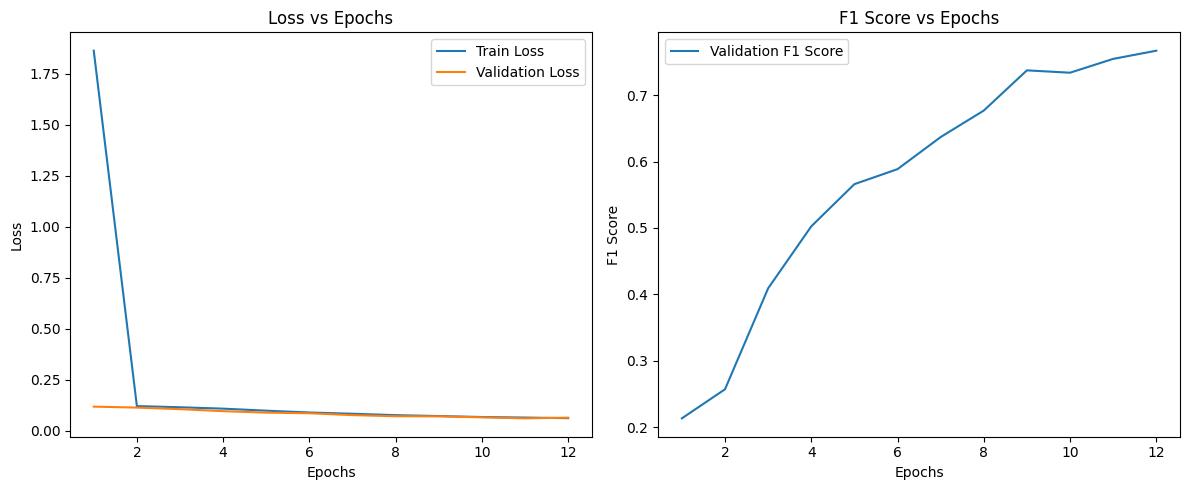

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics import f1_score
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader, random_split

#  the CNN model with Dropout
class SportsCNN(nn.Module):
    def __init__(self, dropout_rate=0.5):
        super(SportsCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 56 * 56, 224)
        self.fc2 = nn.Linear(224, 7)
        self.dropout = nn.Dropout(dropout_rate)  # Dropout layer

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  #  ReLU after first convolution
        x = self.pool(F.relu(self.conv2(x)))  #  ReLU after second convolution
        x = x.view(-1, 64 * 56 * 56)  # Flatten
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

# Custom dataset class
class CustomDataset(Dataset):
    def __init__(self, csv_file, img_dir, transform=None, class_to_idx=None):
        self.data_frame = pd.read_csv(csv_file)
        self.img_dir = img_dir
        self.transform = transform
        self.class_to_idx = class_to_idx

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
        img_name = os.path.join(self.img_dir, self.data_frame.iloc[idx, 0])
        image = Image.open(img_name).convert('RGB')  # Ensure image is RGB
        label = self.class_to_idx[self.data_frame.iloc[idx, 1]]

        if self.transform:
            image = self.transform(image)


        one_hot_label = np.zeros(len(self.class_to_idx))
        one_hot_label[label] = 1.0

        return image, torch.tensor(one_hot_label, dtype=torch.float32)

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),


data_dir = './dataset/'
train_csv = os.path.join(data_dir, 'train.csv')
train_img_dir = os.path.join(data_dir, 'train')
test_csv = os.path.join(data_dir, 'test.csv')
test_img_dir = os.path.join(data_dir, 'test')


class_names = pd.read_csv(train_csv)['label'].unique()
class_to_idx = {class_name: idx for idx, class_name in enumerate(class_names)}

#  dataset and dataloader
full_dataset = CustomDataset(csv_file=train_csv, img_dir=train_img_dir, transform=transform, class_to_idx=class_to_idx)

# Splitting dataset into training and validation sets
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

#  batch size and number of epochs
batch_size = 32
num_epochs = 12

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

#  test dataset and dataloader
test_dataset = CustomDataset(csv_file=test_csv, img_dir=test_img_dir, transform=transform, class_to_idx=class_to_idx)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialize the model
model = SportsCNN(dropout_rate=0.5)  #  dropout rate
criterion = nn.MSELoss()  # Using Mean Squared Error Loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

train_losses = []
val_losses = []
train_f1_scores = []
val_f1_scores = []


def calculate_f1(loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in loader:
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.numpy())
            all_labels.extend(labels.numpy().argmax(axis=1))

    return f1_score(all_labels, all_preds, average='weighted')

# trainable parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'Number of trainable parameters: {count_parameters(model)}')

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    # Training
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()  # Backward pass
        optimizer.step()
        running_loss += loss.item()


    epoch_train_loss = running_loss / len(train_loader)
    train_losses.append(epoch_train_loss)

    # Validation phase
    model.eval()
    running_val_loss = 0.0
    val_f1 = calculate_f1(val_loader)

    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)  #  validation loss
            running_val_loss += loss.item()  #  validation loss

    epoch_val_loss = running_val_loss / len(val_loader)
    val_losses.append(epoch_val_loss)
    val_f1_scores.append(val_f1)

    print(f'Epoch [{epoch + 1}/{num_epochs}], '
          f'Train Loss: {epoch_train_loss:.4f}, '
          f'Val Loss: {epoch_val_loss:.4f}, '
          f'Val F1 Score: {val_f1:.4f}')

# Plotting loss vs epochs
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()

# Plotting F1 score vs epochs
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), val_f1_scores, label='Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Epochs')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# 2. FocalLoss

Number of trainable parameters: 44978887
Epoch [1/12], Train Loss: 1.5084, Val Loss: 1.0686, Val F1 Score: 0.5808
Epoch [2/12], Train Loss: 0.9931, Val Loss: 0.9163, Val F1 Score: 0.6560
Epoch [3/12], Train Loss: 0.6883, Val Loss: 0.8224, Val F1 Score: 0.7228
Epoch [4/12], Train Loss: 0.4251, Val Loss: 0.7289, Val F1 Score: 0.7708
Epoch [5/12], Train Loss: 0.2592, Val Loss: 0.8328, Val F1 Score: 0.7828
Epoch [6/12], Train Loss: 0.1718, Val Loss: 0.9408, Val F1 Score: 0.7733
Epoch [7/12], Train Loss: 0.1314, Val Loss: 0.9872, Val F1 Score: 0.7837
Epoch [8/12], Train Loss: 0.0996, Val Loss: 0.9356, Val F1 Score: 0.7857
Epoch [9/12], Train Loss: 0.0810, Val Loss: 1.1685, Val F1 Score: 0.7833
Epoch [10/12], Train Loss: 0.0652, Val Loss: 1.0848, Val F1 Score: 0.7806
Epoch [11/12], Train Loss: 0.0736, Val Loss: 1.2173, Val F1 Score: 0.7785
Epoch [12/12], Train Loss: 0.0643, Val Loss: 1.4361, Val F1 Score: 0.7702


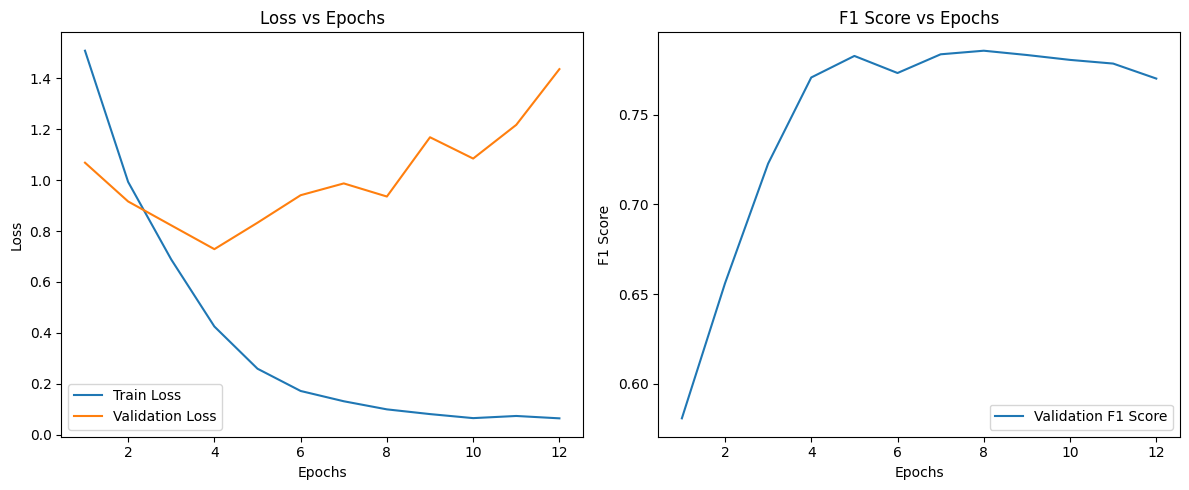

In [ ]:

# the CNN model with Dropout
class SportsCNN(nn.Module):
    def __init__(self, dropout_rate=0.5):
        super(SportsCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 56 * 56, 224)
        self.fc2 = nn.Linear(224, 7)
        self.dropout = nn.Dropout(dropout_rate)  # Dropout layer

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  #  ReLU after first convolution
        x = self.pool(F.relu(self.conv2(x)))  #  ReLU after second convolution
        x = x.view(-1, 64 * 56 * 56)  # Flatten
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.fc2(x)
        return x


class CustomDataset(Dataset):
    def __init__(self, csv_file, img_dir, transform=None, class_to_idx=None):
        self.data_frame = pd.read_csv(csv_file)
        self.img_dir = img_dir
        self.transform = transform
        self.class_to_idx = class_to_idx

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
        img_name = os.path.join(self.img_dir, self.data_frame.iloc[idx, 0])
        image = Image.open(img_name).convert('RGB')
        label = self.class_to_idx[self.data_frame.iloc[idx, 1]]
        if self.transform:
            image = self.transform(image)

        return image, label

#  transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])


data_dir = './dataset/'
train_csv = os.path.join(data_dir, 'train.csv')
train_img_dir = os.path.join(data_dir, 'train')
test_csv = os.path.join(data_dir, 'test.csv')
test_img_dir = os.path.join(data_dir, 'test')


class_names = pd.read_csv(train_csv)['label'].unique()
class_to_idx = {class_name: idx for idx, class_name in enumerate(class_names)}

#  dataset and dataloader
full_dataset = CustomDataset(csv_file=train_csv, img_dir=train_img_dir, transform=transform, class_to_idx=class_to_idx)

# training and validation sets
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

#  batch size and number of epochs
batch_size = 32
num_epochs = 12

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

#  test dataset and dataloader
test_dataset = CustomDataset(csv_file=test_csv, img_dir=test_img_dir, transform=transform, class_to_idx=class_to_idx)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialization of  the model
model = SportsCNN(dropout_rate=0.5)
criterion = nn.CrossEntropyLoss()  #  multi-class classification
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

train_losses = []
val_losses = []
train_f1_scores = []
val_f1_scores = []

# Function to calculate F1 score
def calculate_f1(loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in loader:
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.numpy())
            all_labels.extend(labels.numpy())

    return f1_score(all_labels, all_preds, average='weighted')

#  the number of trainable parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'Number of trainable parameters: {count_parameters(model)}')

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    # Training phase
    for images, labels in train_loader:
        optimizer.zero_grad()  # Zero the gradients
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Calculate the loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights
        running_loss += loss.item()

    #  loss for training
    epoch_train_loss = running_loss / len(train_loader)
    train_losses.append(epoch_train_loss)

    # Validation
    model.eval()
    running_val_loss = 0.0
    val_f1 = calculate_f1(val_loader)

    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()

    epoch_val_loss = running_val_loss / len(val_loader)
    val_losses.append(epoch_val_loss)
    val_f1_scores.append(val_f1)

    print(f'Epoch [{epoch + 1}/{num_epochs}], '
          f'Train Loss: {epoch_train_loss:.4f}, '
          f'Val Loss: {epoch_val_loss:.4f}, '
          f'Val F1 Score: {val_f1:.4f}')

# Plotting loss vs epochs
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()

# Plotting F1 score vs epochs
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), val_f1_scores, label='Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Epochs')
plt.legend()

plt.tight_layout()
plt.show()



In [ ]:
# f. Try different optimization algorithms (such as Gradient Descent, Adam, etc.)

In [ ]:
# 1.  Nesterov Accelerated Gradient (NAG)

Number of trainable parameters: 44978887
Epoch [1/12], Train Loss: 1.5340, Val Loss: 1.2324, Val F1 Score: 0.5072
Epoch [2/12], Train Loss: 1.2145, Val Loss: 1.0627, Val F1 Score: 0.6304
Epoch [3/12], Train Loss: 1.0241, Val Loss: 0.9476, Val F1 Score: 0.6521
Epoch [4/12], Train Loss: 0.8255, Val Loss: 0.8440, Val F1 Score: 0.6999
Epoch [5/12], Train Loss: 0.6295, Val Loss: 0.7493, Val F1 Score: 0.7422
Epoch [6/12], Train Loss: 0.4798, Val Loss: 0.8454, Val F1 Score: 0.7322
Epoch [7/12], Train Loss: 0.3450, Val Loss: 0.8459, Val F1 Score: 0.7582
Epoch [8/12], Train Loss: 0.2796, Val Loss: 0.7910, Val F1 Score: 0.7830
Epoch [9/12], Train Loss: 0.2076, Val Loss: 0.9427, Val F1 Score: 0.7740
Epoch [10/12], Train Loss: 0.1745, Val Loss: 0.8303, Val F1 Score: 0.7952
Epoch [11/12], Train Loss: 0.1430, Val Loss: 0.9577, Val F1 Score: 0.7815
Epoch [12/12], Train Loss: 0.1325, Val Loss: 0.8129, Val F1 Score: 0.8108


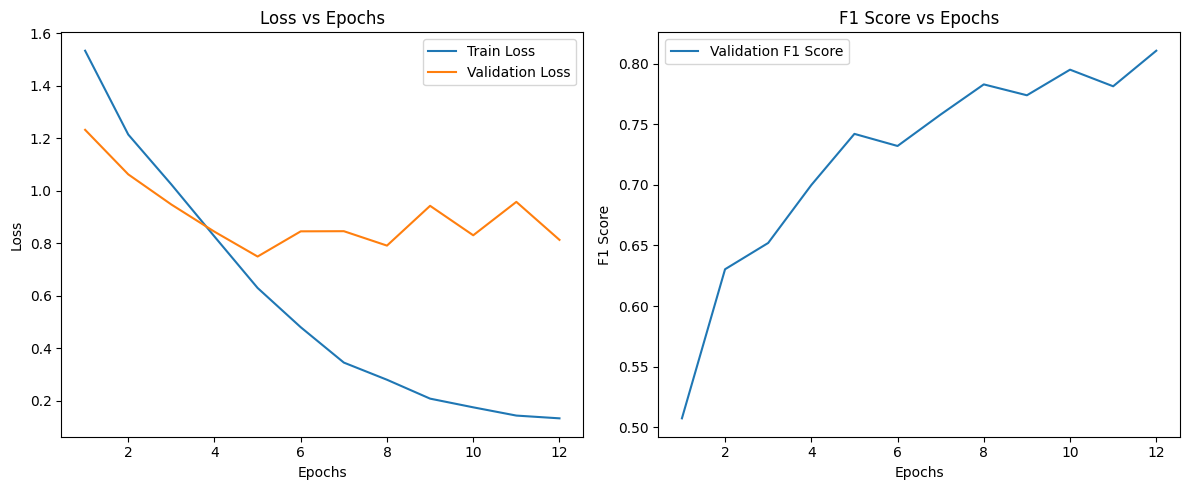

In [ ]:


#  the CNN model with Dropout
class SportsCNN(nn.Module):
    def __init__(self, dropout_rate=0.5):
        super(SportsCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 56 * 56, 224)
        self.fc2 = nn.Linear(224, 7)
        self.dropout = nn.Dropout(dropout_rate)  # Dropout layer

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  #  ReLU after first convolution
        x = self.pool(F.relu(self.conv2(x)))  #  ReLU after second convolution
        x = x.view(-1, 64 * 56 * 56)  # Flatten
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

# Custom dataset
class CustomDataset(Dataset):
    def __init__(self, csv_file, img_dir, transform=None, class_to_idx=None):
        self.data_frame = pd.read_csv(csv_file)
        self.img_dir = img_dir
        self.transform = transform
        self.class_to_idx = class_to_idx

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
        img_name = os.path.join(self.img_dir, self.data_frame.iloc[idx, 0])
        image = Image.open(img_name).convert('RGB')
        label = self.class_to_idx[self.data_frame.iloc[idx, 1]]

        if self.transform:
            image = self.transform(image)

        return image, label

# transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])


data_dir = './dataset/'
train_csv = os.path.join(data_dir, 'train.csv')
train_img_dir = os.path.join(data_dir, 'train')
test_csv = os.path.join(data_dir, 'test.csv')
test_img_dir = os.path.join(data_dir, 'test')

class_names = pd.read_csv(train_csv)['label'].unique()
class_to_idx = {class_name: idx for idx, class_name in enumerate(class_names)}

#  dataset and dataloader
full_dataset = CustomDataset(csv_file=train_csv, img_dir=train_img_dir, transform=transform, class_to_idx=class_to_idx)

# training and validation sets
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# batch size and number of epochs
batch_size = 32
num_epochs = 12

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

#  test dataset and dataloader
test_dataset = CustomDataset(csv_file=test_csv, img_dir=test_img_dir, transform=transform, class_to_idx=class_to_idx)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

#  the model
model = SportsCNN(dropout_rate=0.5)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9, nesterov=True)

train_losses = []
val_losses = []
train_f1_scores = []
val_f1_scores = []


def calculate_f1(loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in loader:
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.numpy())
            all_labels.extend(labels.numpy())

    return f1_score(all_labels, all_preds, average='weighted')

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'Number of trainable parameters: {count_parameters(model)}')

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    # Training
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()


    epoch_train_loss = running_loss / len(train_loader)
    train_losses.append(epoch_train_loss)

    # Validation
    model.eval()
    running_val_loss = 0.0
    val_f1 = calculate_f1(val_loader)

    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()

    epoch_val_loss = running_val_loss / len(val_loader)
    val_losses.append(epoch_val_loss)
    val_f1_scores.append(val_f1)

    print(f'Epoch [{epoch + 1}/{num_epochs}], '
          f'Train Loss: {epoch_train_loss:.4f}, '
          f'Val Loss: {epoch_val_loss:.4f}, '
          f'Val F1 Score: {val_f1:.4f}')

#  loss vs epochs
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()

#  F1 score vs epochs
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), val_f1_scores, label='Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Epochs')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# 2.  Stochastic Gradient Descent (SGD)

Number of trainable parameters: 44978887
Epoch [1/12], Train Loss: 1.5975, Val Loss: 1.3011, Val F1 Score: 0.5400
Epoch [2/12], Train Loss: 1.3216, Val Loss: 1.2211, Val F1 Score: 0.5040
Epoch [3/12], Train Loss: 1.1620, Val Loss: 1.1125, Val F1 Score: 0.6194
Epoch [4/12], Train Loss: 0.9822, Val Loss: 0.8658, Val F1 Score: 0.6918
Epoch [5/12], Train Loss: 0.8070, Val Loss: 0.7526, Val F1 Score: 0.7389
Epoch [6/12], Train Loss: 0.6243, Val Loss: 0.7783, Val F1 Score: 0.7283
Epoch [7/12], Train Loss: 0.4853, Val Loss: 0.8311, Val F1 Score: 0.7524
Epoch [8/12], Train Loss: 0.3289, Val Loss: 0.7855, Val F1 Score: 0.7812
Epoch [9/12], Train Loss: 0.2472, Val Loss: 0.8194, Val F1 Score: 0.7907
Epoch [10/12], Train Loss: 0.1781, Val Loss: 0.8273, Val F1 Score: 0.7889
Epoch [11/12], Train Loss: 0.1377, Val Loss: 0.7926, Val F1 Score: 0.8037
Epoch [12/12], Train Loss: 0.1099, Val Loss: 0.8383, Val F1 Score: 0.8077


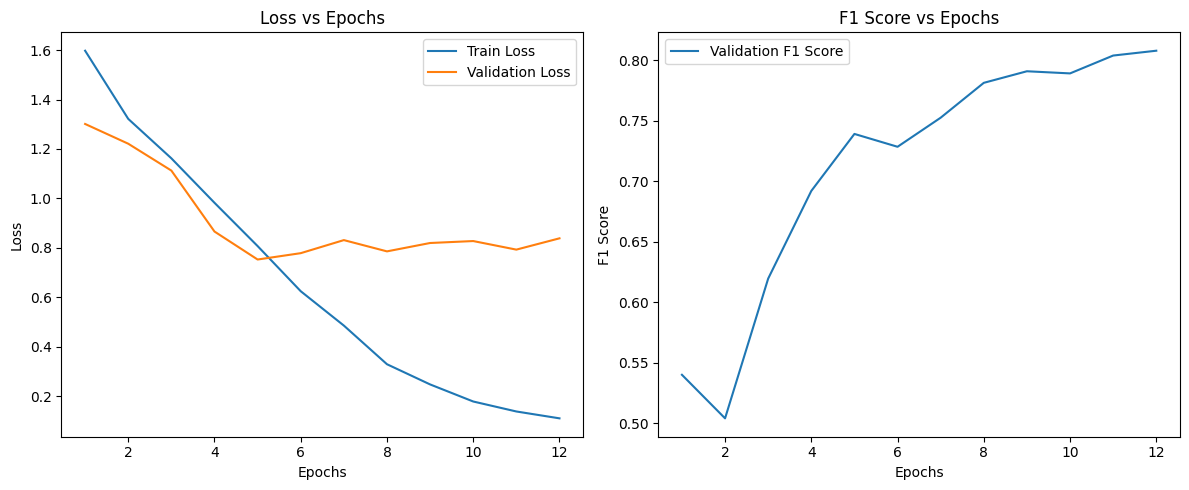

In [ ]:


# the CNN model with Dropout
class SportsCNN(nn.Module):
    def __init__(self, dropout_rate=0.5):
        super(SportsCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 56 * 56, 224)
        self.fc2 = nn.Linear(224, 7)  # Output layer for 7 classes
        self.dropout = nn.Dropout(dropout_rate)  # Dropout layer

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  #  ReLU after first convolution
        x = self.pool(F.relu(self.conv2(x)))  #  ReLU after second convolution
        x = x.view(-1, 64 * 56 * 56)  # Flatten
        x = self.dropout(F.relu(self.fc1(x)))  # dropout after first fully connected layer
        x = self.fc2(x)
        return x

# Custom dataset
class CustomDataset(Dataset):
    def __init__(self, csv_file, img_dir, transform=None, class_to_idx=None):
        self.data_frame = pd.read_csv(csv_file)
        self.img_dir = img_dir
        self.transform = transform
        self.class_to_idx = class_to_idx

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
        img_name = os.path.join(self.img_dir, self.data_frame.iloc[idx, 0])
        image = Image.open(img_name).convert('RGB')
        label = self.class_to_idx[self.data_frame.iloc[idx, 1]]

        if self.transform:
            image = self.transform(image)

        return image, label

#  transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])


data_dir = './dataset/'
train_csv = os.path.join(data_dir, 'train.csv')
train_img_dir = os.path.join(data_dir, 'train')
test_csv = os.path.join(data_dir, 'test.csv')
test_img_dir = os.path.join(data_dir, 'test')


class_names = pd.read_csv(train_csv)['label'].unique()
class_to_idx = {class_name: idx for idx, class_name in enumerate(class_names)}


full_dataset = CustomDataset(csv_file=train_csv, img_dir=train_img_dir, transform=transform, class_to_idx=class_to_idx)

# Splitting dataset into training and validation sets
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])


batch_size = 32
num_epochs = 12

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

#  test dataset and dataloader
test_dataset = CustomDataset(csv_file=test_csv, img_dir=test_img_dir, transform=transform, class_to_idx=class_to_idx)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


model = SportsCNN(dropout_rate=0.5)  #  dropout rate
criterion = nn.CrossEntropyLoss()  #  multi-class classification
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

train_losses = []
val_losses = []
train_f1_scores = []
val_f1_scores = []

def calculate_f1(loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in loader:
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.numpy())
            all_labels.extend(labels.numpy())

    return f1_score(all_labels, all_preds, average='weighted')


def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'Number of trainable parameters: {count_parameters(model)}')

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0


    for images, labels in train_loader:
        optimizer.zero_grad()  # Zero the gradients
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Calculate the loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights
        running_loss += loss.item()  # Accumulate loss


    epoch_train_loss = running_loss / len(train_loader)
    train_losses.append(epoch_train_loss)


    model.eval()
    running_val_loss = 0.0
    val_f1 = calculate_f1(val_loader)

    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()

    epoch_val_loss = running_val_loss / len(val_loader)
    val_losses.append(epoch_val_loss)
    val_f1_scores.append(val_f1)

    print(f'Epoch [{epoch + 1}/{num_epochs}], '
          f'Train Loss: {epoch_train_loss:.4f}, '
          f'Val Loss: {epoch_val_loss:.4f}, '
          f'Val F1 Score: {val_f1:.4f}')


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), val_f1_scores, label='Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Epochs')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Best Model: SO, we achieved arounf 82 % of accuracy with the model which has adam as optimizer, dropt out as regularization, Relu as activation function and cross entropy as loss function.
# if we run it on more epochs then we surely received the good accuracy from the model.